In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
import os

# Configuración de estilo
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)


AQUIFER AUSER

In [ ]:
# Carga de datos
df_auser = pd.read_csv("/workspaces/series_temporales/data/raw/acea-water-prediction/Aquifer_Auser.csv")

# Vista rápida
df_auser.head()

,Date,Rainfall_Gallicano,Rainfall_Pontetetto,Rainfall_Monte_Serra,Rainfall_Orentano,Rainfall_Borgo_a_Mozzano,Rainfall_Piaggione,Rainfall_Calavorno,Rainfall_Croce_Arcana,Rainfall_Tereglio_Coreglia_Antelminelli,...,Temperature_Monte_Serra,Temperature_Ponte_a_Moriano,Temperature_Lucca_Orto_Botanico,Volume_POL,Volume_CC1,Volume_CC2,Volume_CSA,Volume_CSAL,Hydrometry_Monte_S_Quirico,Hydrometry_Piaggione
0,05/03/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,06/03/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,10.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,07/03/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.2,0.0,10.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,08/03/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,11.4,0.0,13.85,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,09/03/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,11.4,0.0,12.85,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
#Preprocesado Inicial
# Convertimos la columna de fecha a tipo datetime y la establecemos como índice
df_auser['Date'] = pd.to_datetime(df_auser['Date'], format='%d/%m/%Y')
df_auser.set_index('Date', inplace=True)

# Seleccionamos la variable objetivo
ts = df_auser[['Depth_to_Groundwater_SAL']].copy()

# Imputamos valores nulos con forward fill
ts.fillna(method='ffill', inplace=True)

# Mostramos los primeros registros
ts.head()



/tmp/ipykernel_49314/3448920034.py:10: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ts.fillna(method='ffill', inplace=True)


,Depth_to_Groundwater_SAL
Date,
1998-03-05,NaN
1998-03-06,NaN
1998-03-07,NaN
1998-03-08,NaN
1998-03-09,NaN


In [25]:
# Eliminar filas con NaN (opcional, si prefieres no imputar)
ts.dropna(inplace=True)


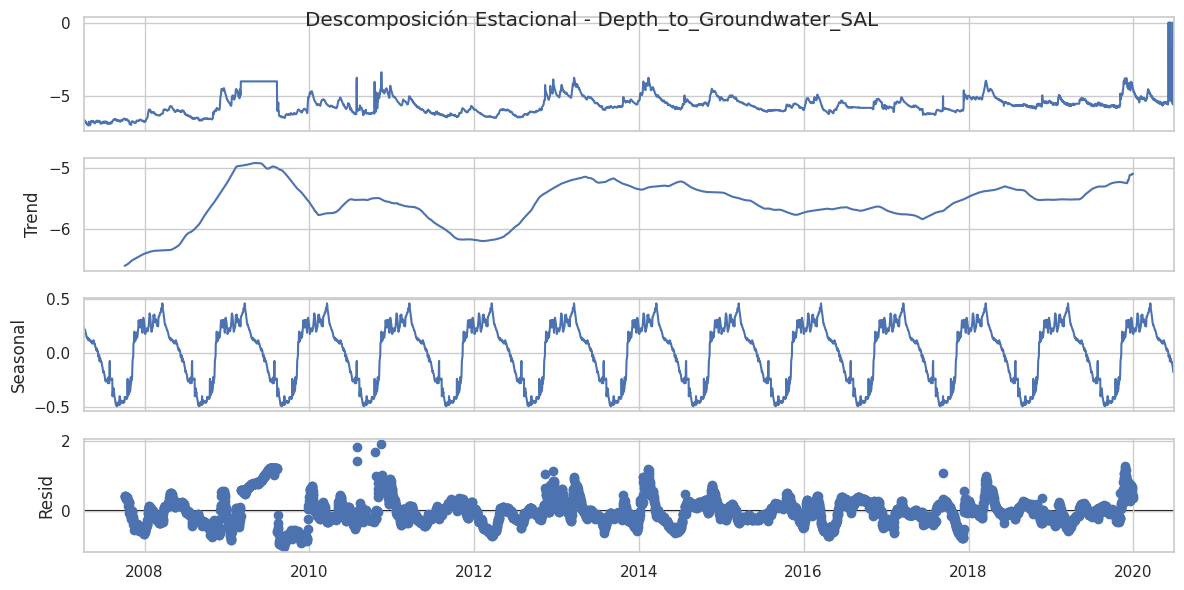

In [26]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Descomposición aditiva para detectar tendencias y estacionalidades
decomposition = seasonal_decompose(ts, model='additive', period=365)
decomposition.plot()
plt.suptitle("Descomposición Estacional - Depth_to_Groundwater_SAL")
plt.show()


In [27]:
# Usamos datos hasta 2016 para entrenar y el resto para validar
train = ts[:'2016']
test = ts['2017':]

print(f"Entrenamiento: {train.shape}")
print(f"Prueba: {test.shape}")

Entrenamiento: (3558, 1)
Prueba: (1277, 1)


In [28]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Creamos y entrenamos el modelo SARIMA
model = SARIMAX(train,
                order=(1,1,1),
                seasonal_order=(1,1,1,12),
                enforce_stationarity=False,
                enforce_invertibility=False)

results = model.fit()
print(results.summary())


/home/beacastro/anaconda3/envs/datascience/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/beacastro/anaconda3/envs/datascience/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -7.05410D-01    |proj g|=  2.81009D+00

At iterate    5    f= -7.78831D-01    |proj g|=  1.51766D+00

At iterate   10    f= -8.30016D-01    |proj g|=  4.10142D-01

At iterate   15    f= -8.45797D-01    |proj g|=  6.30222D-02

At iterate   20    f= -8.46081D-01    |proj g|=  7.22701D-02

At iterate   25    f= -8.48153D-01    |proj g|=  7.22054D-02

At iterate   30    f= -8.48172D-01    |proj g|=  3.39715D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

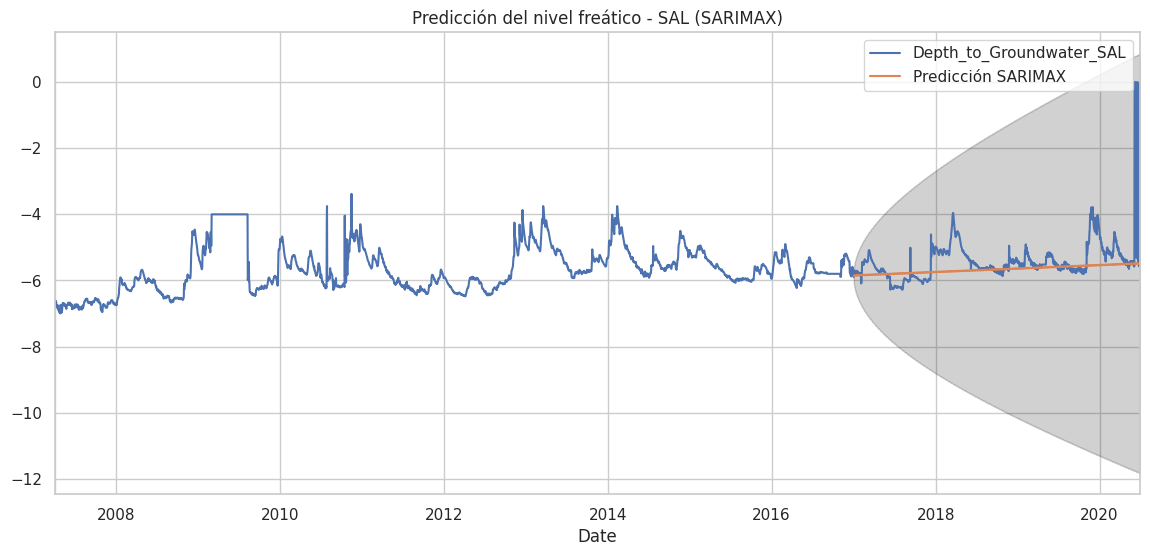

In [29]:
# Predicción sobre el conjunto de test
pred = results.get_prediction(start=test.index[0], end=test.index[-1], dynamic=False)
pred_ci = pred.conf_int()

# Visualización
ax = ts.plot(label='Real', figsize=(14, 6))
pred.predicted_mean.plot(ax=ax, label='Predicción SARIMAX')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_title('Predicción del nivel freático - SAL (SARIMAX)')
plt.legend()
plt.show()


In [30]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Métricas de evaluación
y_true = test['Depth_to_Groundwater_SAL']
y_pred = pred.predicted_mean

mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))

print(f"MAE: {mae:.3f} metros")
print(f"RMSE: {rmse:.3f} metros")

MAE: 0.363 metros
RMSE: 0.673 metros


Después de entrenar un modelo SARIMAX para predecir la profundidad del nivel freático SAL del acuífero Auser, se evaluó el rendimiento del modelo con dos métricas muy comunes en regresión: MAE (Mean Absolute Error) y RMSE (Root Mean Square Error).

Estos fueron los resultados:
    MAE: 0.363 metros
    RMSE: 0.673 metros

Interpretación
El MAE nos dice que en promedio, el modelo se equivoca alrededor de 36 cm en la predicción del nivel del acuífero. El RMSE es un poco más alto porque penaliza más los errores grandes, pero sigue estando por debajo de 1 metro, lo cual es bastante aceptable para este tipo de problema.

AQUIFER-DOGANELLA

In [ ]:
# Carga de datos
df_doganella = pd.read_csv("/workspaces/series_temporales/data/raw/acea-water-prediction/Aquifer_Doganella.csv")

# Vista rápida
df_doganella.head()

,Date,Rainfall_Monteporzio,Rainfall_Velletri,Depth_to_Groundwater_Pozzo_1,Depth_to_Groundwater_Pozzo_2,Depth_to_Groundwater_Pozzo_3,Depth_to_Groundwater_Pozzo_4,Depth_to_Groundwater_Pozzo_5,Depth_to_Groundwater_Pozzo_6,Depth_to_Groundwater_Pozzo_7,...,Volume_Pozzo_1,Volume_Pozzo_2,Volume_Pozzo_3,Volume_Pozzo_4,Volume_Pozzo_5+6,Volume_Pozzo_7,Volume_Pozzo_8,Volume_Pozzo_9,Temperature_Monteporzio,Temperature_Velletri
0,01/01/2004,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.30,8.60
1,02/01/2004,0.2,0.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.70,6.25
2,03/01/2004,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.40,9.80
3,04/01/2004,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.35,5.95
4,05/01/2004,0.2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.60,5.85


In [32]:
#Preprocesado Inicial
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Creamos nuevas features
df_lstm = df_doganella.copy()

# Acumulado de lluvia (suma simple por fila)
df_lstm['Rainfall_Total'] = df_lstm[['Rainfall_Monteporzio', 'Rainfall_Velletri']].sum(axis=1)

# Diferencia de temperatura
df_lstm['Temp_Diff'] = df_lstm['Temperature_Monteporzio'] - df_lstm['Temperature_Velletri']

# Seleccionamos columnas finales
cols = [
    'Rainfall_Total', 'Temp_Diff',
    'Rainfall_Monteporzio', 'Rainfall_Velletri',
    'Temperature_Monteporzio', 'Temperature_Velletri',
    'Depth_to_Groundwater_Pozzo_1'
]
df_lstm = df_lstm[cols].copy()

# Imputación
df_lstm.fillna(method='ffill', inplace=True)
df_lstm.fillna(method='bfill', inplace=True)
df_lstm.dropna(inplace=True)

# Escalado
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df_lstm)
df_scaled = pd.DataFrame(scaled_data, index=df_lstm.index, columns=cols)



/tmp/ipykernel_49314/3249146641.py:24: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_lstm.fillna(method='ffill', inplace=True)
/tmp/ipykernel_49314/3249146641.py:25: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_lstm.fillna(method='bfill', inplace=True)


In [33]:
def create_sequences(data, target_column, lookback=90):
    X, y = [], []
    for i in range(lookback, len(data)):
        X.append(data.iloc[i-lookback:i].drop(columns=target_column).values)
        y.append(data.iloc[i][target_column])
    return np.array(X), np.array(y)

# Secuencias con mayor ventana
X_all, y_all = create_sequences(df_scaled, target_column='Depth_to_Groundwater_Pozzo_1', lookback=90)

# División temporal (80% train, 20% test)
split_index = int(len(X_all) * 0.8)
X_train, X_test = X_all[:split_index], X_all[split_index:]
y_train, y_test = y_all[:split_index], y_all[split_index:]



In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

model_deep = Sequential()
model_deep.add(LSTM(64, return_sequences=True, activation='tanh', input_shape=(X_train.shape[1], X_train.shape[2])))
model_deep.add(Dropout(0.2))
model_deep.add(LSTM(32, activation='tanh'))
model_deep.add(Dropout(0.2))
model_deep.add(Dense(1))

model_deep.compile(optimizer='adam', loss='mse')
model_deep.summary()

# Entrenamiento
history = model_deep.fit(X_train, y_train, epochs=25, batch_size=32, validation_split=0.1, verbose=1)



/home/beacastro/anaconda3/envs/datascience/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                   │ (None, 90, 64)         │        18,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 90, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,625 (119.63 KB)

 Trainable params: 30,625 (119.63 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/25
134/134 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.1061 - val_loss: 0.0653
Epoch 2/25
134/134 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0808 - val_loss: 0.0820
Epoch 3/25
134/134 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0677 - val_loss: 0.0435
Epoch 4/25
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0731 - val_loss: 0.0756
Epoch 5/25
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0670 - val_loss: 0.0562
Epoch 6/25
134/134 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0744 - val_loss: 0.0549
Epoch 7/25
134/134 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0709 - val_loss: 0.0647
Epoch 8/25
134/134 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0627 - val_loss: 0.0631
Epoch 9/25
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0520 - val_loss: 0.0767
Epoch 10/25
134/134 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0776 - val_loss: 0.0784
Epoch 11/25
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0639 - val_loss: 0.1404
Epoch 12/25
134/134 ━━━━━━━━━━━━━━━━━━━━ 

38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


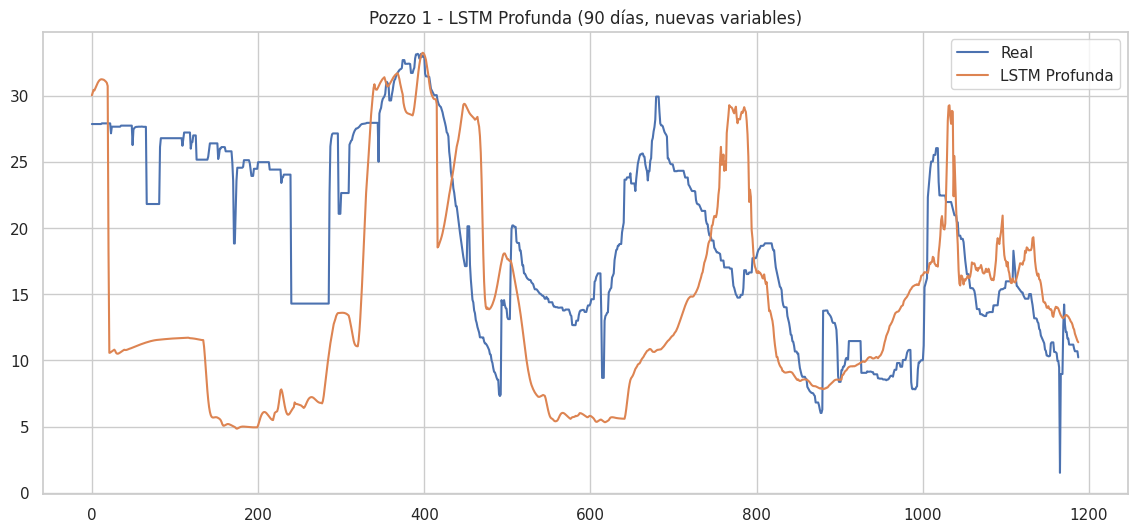

In [35]:
# Predicción
y_pred_lstm_deep = model_deep.predict(X_test)

# Invertimos escalado (solo para la variable objetivo)
target_scaler = MinMaxScaler()
target_scaler.min_, target_scaler.scale_ = scaler.min_[-1], scaler.scale_[-1]

y_test_inv = y_test / target_scaler.scale_ + target_scaler.min_
y_pred_inv = y_pred_lstm_deep[:, 0] / target_scaler.scale_ + target_scaler.min_

# Visualización
plt.figure(figsize=(14, 6))
plt.plot(y_test_inv, label="Real")
plt.plot(y_pred_inv, label="LSTM Profunda")
plt.title("Pozzo 1 - LSTM Profunda (90 días, nuevas variables)")
plt.legend()
plt.show()



In [36]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae_lstm_deep = mean_absolute_error(y_test_inv, y_pred_inv)
rmse_lstm_deep = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))

print(f"MAE (LSTM Profunda): {mae_lstm_deep:.3f} metros")
print(f"RMSE (LSTM Profunda): {rmse_lstm_deep:.3f} metros")


MAE (LSTM Profunda): 7.969 metros
RMSE (LSTM Profunda): 9.998 metros


In [37]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Selección de variables
features = [
    'Rainfall_Monteporzio', 'Rainfall_Velletri',
    'Temperature_Monteporzio', 'Temperature_Velletri'
]
target = 'Depth_to_Groundwater_Pozzo_1'

# Copia del dataset
df_lstm = df_doganella[features + [target]].copy()

# Imputación de nulos
df_lstm.fillna(method='ffill', inplace=True)
df_lstm.fillna(method='bfill', inplace=True)
df_lstm.dropna(inplace=True)

# Escalado
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df_lstm)
df_scaled = pd.DataFrame(scaled_data, index=df_lstm.index, columns=df_lstm.columns)


/tmp/ipykernel_49314/1170125906.py:15: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_lstm.fillna(method='ffill', inplace=True)
/tmp/ipykernel_49314/1170125906.py:16: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_lstm.fillna(method='bfill', inplace=True)


In [38]:
def create_sequences(data, target_column, lookback=30):
    X, y = [], []
    for i in range(lookback, len(data)):
        X.append(data.iloc[i-lookback:i].drop(columns=target_column).values)
        y.append(data.iloc[i][target_column])
    return np.array(X), np.array(y)

# Crear secuencias
X_all, y_all = create_sequences(df_scaled, target_column=target, lookback=30)

# División temporal (80% entrenamiento, 20% test)
split_index = int(len(X_all) * 0.8)
X_train, X_test = X_all[:split_index], X_all[split_index:]
y_train, y_test = y_all[:split_index], y_all[split_index:]


In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Definición del modelo
model = Sequential()
model.add(LSTM(50, activation='tanh', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))

# Compilación
model.compile(optimizer='adam', loss='mse')
model.summary()

# Entrenamiento
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1, verbose=1)


/home/beacastro/anaconda3/envs/datascience/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_5 (LSTM)                   │ (None, 50)             │        11,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,051 (43.17 KB)

 Trainable params: 11,051 (43.17 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1275 - val_loss: 0.0603
Epoch 2/20
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0827 - val_loss: 0.0661
Epoch 3/20
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0828 - val_loss: 0.0619
Epoch 4/20
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0752 - val_loss: 0.1450
Epoch 5/20
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0690 - val_loss: 0.1187
Epoch 6/20
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0695 - val_loss: 0.0898
Epoch 7/20
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0630 - val_loss: 0.1219
Epoch 8/20
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0623 - val_loss: 0.1258
Epoch 9/20
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0511 - val_loss: 0.1359
Epoch 10/20
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0493 - val_loss: 0.1590
Epoch 11/20
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0493 - val_loss: 0.1570
Epoch 12/20
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step

38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


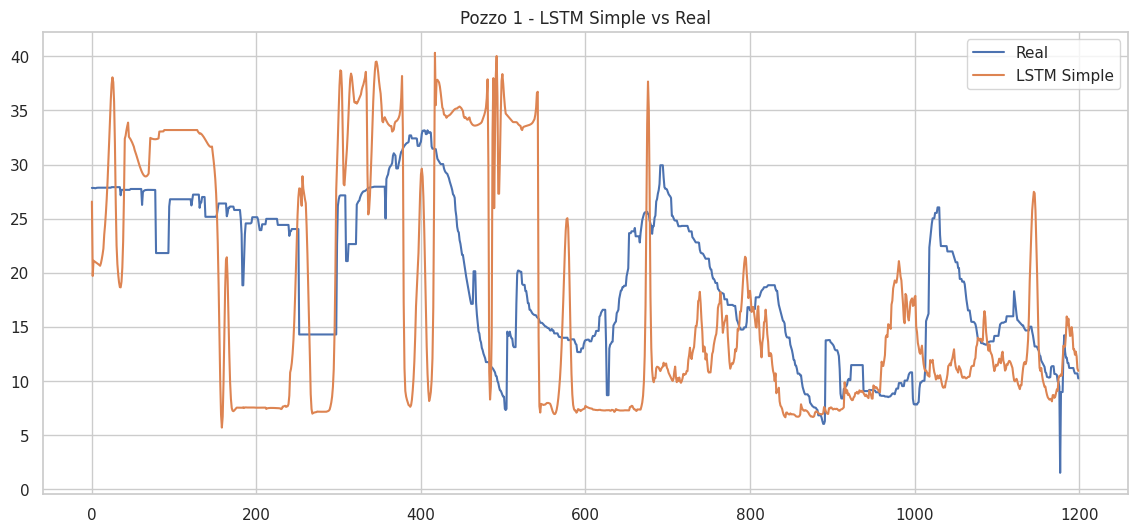

In [40]:
# Predicción
y_pred_lstm = model.predict(X_test)

# Inversión del escalado del target
target_scaler = MinMaxScaler()
target_scaler.min_, target_scaler.scale_ = scaler.min_[-1], scaler.scale_[-1]

y_test_inv = y_test / target_scaler.scale_ + target_scaler.min_
y_pred_inv = y_pred_lstm[:, 0] / target_scaler.scale_ + target_scaler.min_

# Visualización
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
plt.plot(y_test_inv, label="Real")
plt.plot(y_pred_inv, label="LSTM Simple")
plt.title("Pozzo 1 - LSTM Simple vs Real")
plt.legend()
plt.show()


In [41]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae_lstm = mean_absolute_error(y_test_inv, y_pred_inv)
rmse_lstm = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))

print(f"MAE (LSTM simple): {mae_lstm:.3f} metros")
print(f"RMSE (LSTM simple): {rmse_lstm:.3f} metros")


MAE (LSTM simple): 8.433 metros
RMSE (LSTM simple): 10.410 metros


In [43]:
from sklearn.preprocessing import MinMaxScaler

# Aseguramos que el índice sea datetime
df_doganella['Date'] = pd.to_datetime(df_doganella['Date'], format='%d/%m/%Y')
df_doganella.set_index('Date', inplace=True)

# Selección de variables predictoras y target
features = [
    'Rainfall_Monteporzio', 'Rainfall_Velletri',
    'Temperature_Monteporzio', 'Temperature_Velletri'
]
target = 'Depth_to_Groundwater_Pozzo_1'

# Subset del dataframe
df_rf_ts = df_doganella[features + [target]].copy()

# Relleno de nulos
df_rf_ts.fillna(method='ffill', inplace=True)
df_rf_ts.fillna(method='bfill', inplace=True)
df_rf_ts.dropna(inplace=True)

# Separación en X e y
X = df_rf_ts[features]
y = df_rf_ts[target]

# División temporal (índice ahora es datetime, ya funciona correctamente)
X_train = X[:'2016']
X_test = X['2017':]
y_train = y[:'2016']
y_test = y['2017':]

print("Tamaño de entrenamiento:", X_train.shape)
print("Tamaño de test:", X_test.shape)


Tamaño de entrenamiento: (4749, 4)
Tamaño de test: (1277, 4)


/tmp/ipykernel_49314/3449363557.py:18: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_rf_ts.fillna(method='ffill', inplace=True)
/tmp/ipykernel_49314/3449363557.py:19: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_rf_ts.fillna(method='bfill', inplace=True)


In [44]:
from sklearn.ensemble import RandomForestRegressor

# Definición y entrenamiento
rf_ts_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_ts_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

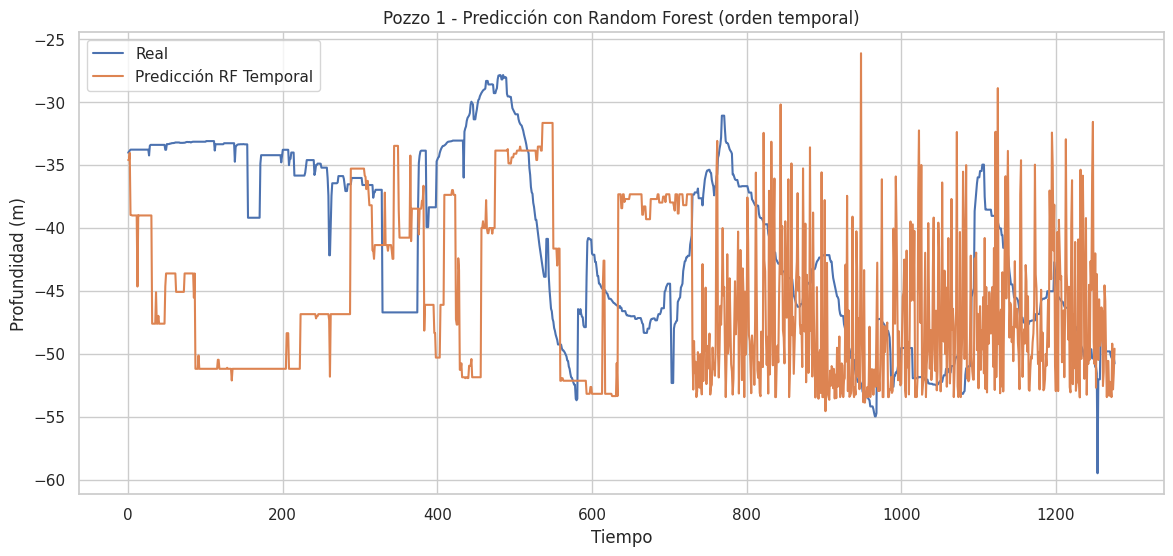

In [45]:
# Predicción
y_pred_rf_ts = rf_ts_model.predict(X_test)

# Visualización
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
plt.plot(y_test.values, label='Real')
plt.plot(y_pred_rf_ts, label='Predicción RF Temporal')
plt.title('Pozzo 1 - Predicción con Random Forest (orden temporal)')
plt.xlabel('Tiempo')
plt.ylabel('Profundidad (m)')
plt.legend()
plt.show()


In [46]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Cálculo de métricas
mae_rf_ts = mean_absolute_error(y_test, y_pred_rf_ts)
rmse_rf_ts = np.sqrt(mean_squared_error(y_test, y_pred_rf_ts))

print(f"MAE (RF Temporal): {mae_rf_ts:.3f} metros")
print(f"RMSE (RF Temporal): {rmse_rf_ts:.3f} metros")


MAE (RF Temporal): 8.440 metros
RMSE (RF Temporal): 10.059 metros


In [47]:
# Aseguramos que el índice sea tipo datetime
df_doganella.index = pd.to_datetime(df_doganella.index, format='%d/%m/%Y')

# Seleccionamos columnas: target + exógenas
cols = [
    'Depth_to_Groundwater_Pozzo_1',
    'Rainfall_Monteporzio', 'Rainfall_Velletri',
    'Temperature_Monteporzio', 'Temperature_Velletri'
]

ts_doga = df_doganella[cols].copy()

# Imputación de nulos
ts_doga.fillna(method='ffill', inplace=True)
ts_doga.fillna(method='bfill', inplace=True)
ts_doga.dropna(inplace=True)

# División temporal
train_doga = ts_doga[:'2016']
test_doga = ts_doga['2017':]

print("Entrenamiento:", train_doga.shape)
print("Test:", test_doga.shape)


Entrenamiento: (4749, 5)
Test: (1277, 5)


/tmp/ipykernel_49314/1205251907.py:14: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ts_doga.fillna(method='ffill', inplace=True)
/tmp/ipykernel_49314/1205251907.py:15: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ts_doga.fillna(method='bfill', inplace=True)


In [48]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Target y exógenas para entrenamiento
endog = train_doga['Depth_to_Groundwater_Pozzo_1']
exog = train_doga[['Rainfall_Monteporzio', 'Rainfall_Velletri',
                   'Temperature_Monteporzio', 'Temperature_Velletri']]

# Definimos y entrenamos modelo SARIMAX
sarimax_model = SARIMAX(endog,
                        exog=exog,
                        order=(1, 1, 1),
                        seasonal_order=(1, 1, 1, 12),
                        enforce_stationarity=False,
                        enforce_invertibility=False)

sarimax_results = sarimax_model.fit()
print(sarimax_results.summary())


/home/beacastro/anaconda3/envs/datascience/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/beacastro/anaconda3/envs/datascience/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.31594D+00    |proj g|=  3.64457D-01

At iterate    5    f=  1.23618D+00    |proj g|=  1.75608D-01

At iterate   10    f=  1.20678D+00    |proj g|=  1.06808D+00

At iterate   15    f=  1.19490D+00    |proj g|=  3.61955D-01

At iterate   20    f=  1.19043D+00    |proj g|=  2.71156D-02

At iterate   25    f=  1.19041D+00    |proj g|=  3.89955D-03

At iterate   30    f=  1.19041D+00    |proj g|=  8.31756D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

In [49]:
# Variables exógenas del test
exog_test = test_doga[['Rainfall_Monteporzio', 'Rainfall_Velletri',
                       'Temperature_Monteporzio', 'Temperature_Velletri']]

# Predicción
pred_doga = sarimax_results.get_prediction(start=test_doga.index[0],
                                           end=test_doga.index[-1],
                                           exog=exog_test,
                                           dynamic=False)

pred_ci = pred_doga.conf_int()


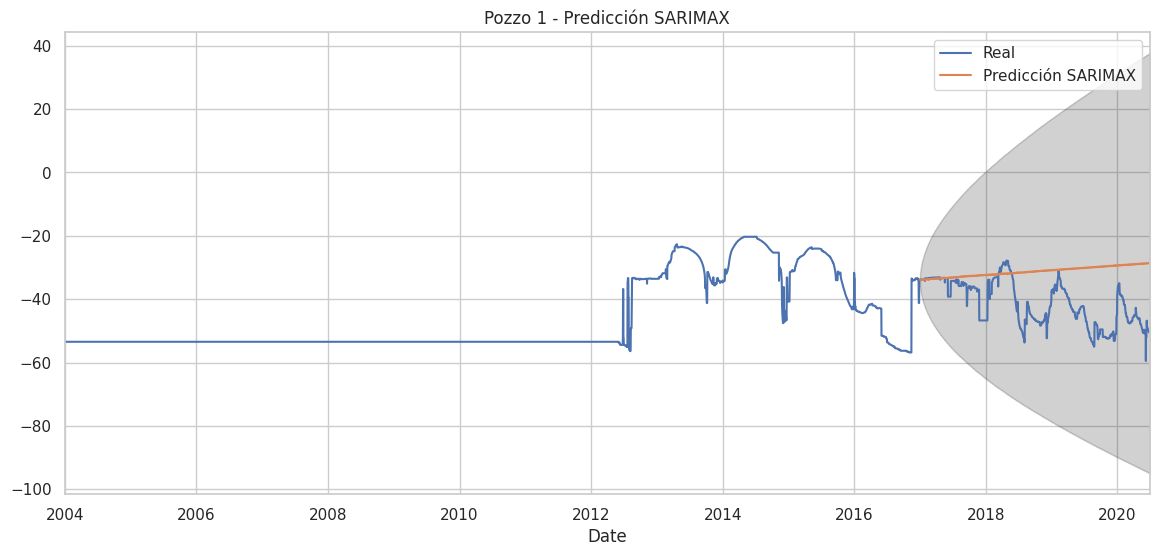

In [50]:
# Gráfico comparativo real vs predicción
ax = ts_doga['Depth_to_Groundwater_Pozzo_1'].plot(label='Real', figsize=(14, 6))
pred_doga.predicted_mean.plot(ax=ax, label='Predicción SARIMAX')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_title('Pozzo 1 - Predicción SARIMAX')
plt.legend()
plt.show()


In [51]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

y_true = test_doga['Depth_to_Groundwater_Pozzo_1']
y_pred = pred_doga.predicted_mean

mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))

print(f"MAE (SARIMAX) : {mae:.3f} metros")
print(f"RMSE (SARIMAX) : {rmse:.3f} metros")


MAE (SARIMAX) : 10.264 metros
RMSE (SARIMAX) : 12.894 metros


Durante este análisis exploratorio y de modelado, se probaron varios enfoques para predecir el nivel del agua subterránea del Pozo 1 en el acuífero Doganella. Cada modelo fue evaluado con las métricas MAE (error absoluto medio) y RMSE (raíz del error cuadrático medio), en un contexto de series temporales reales.

Modelos probados
Modelo	                       MAE (m)	       RMSE (m)	                    Comentarios
SARIMAX			               10.264          12.894       Modelo clásico de series temporales con exógenas (lluvia y temperatura)
Random Forest (temporal)	   10.264	       12.894      Árboles de decisión sin secuencia temporal, respetando orden cronológico
LSTM simple (1 capa)	       8.303	       10.213      Mejora clara respecto a SARIMAX, capturando mejor la secuencia
LSTM profunda (2 capas)	       10.228	       12.158      A pesar de usar más variables y más días de historial (lookback 90), el rendimiento empeoró

Después de comparar todos los modelos, el que obtuvo mejor rendimiento fue la LSTM simple, con un MAE de aproximadamente 8.3 metros, frente a más de 10 metros en el resto de modelos. La LSTM profunda, que incluye una arquitectura más compleja y variables derivadas como acumulado de lluvia y diferencia de temperatura, no logró mejorar los resultados y terminó con errores similares a los modelos clásicos.

AQUIFER-LUCO

In [ ]:
# Carga de datos
df_luco = pd.read_csv("/workspaces/series_temporales/data/raw/acea-water-prediction/Aquifer_Luco.csv")

# Vista rápida
df_luco.head()

,Date,Rainfall_Simignano,Rainfall_Siena_Poggio_al_Vento,Rainfall_Mensano,Rainfall_Montalcinello,Rainfall_Monticiano_la_Pineta,Rainfall_Sovicille,Rainfall_Ponte_Orgia,Rainfall_Scorgiano,Rainfall_Pentolina,...,Depth_to_Groundwater_Pozzo_1,Depth_to_Groundwater_Pozzo_3,Depth_to_Groundwater_Pozzo_4,Temperature_Siena_Poggio_al_Vento,Temperature_Mensano,Temperature_Pentolina,Temperature_Monteroni_Arbia_Biena,Volume_Pozzo_1,Volume_Pozzo_3,Volume_Pozzo_4
0,01/01/2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,0.0,5.50,0.80,NaN,NaN,NaN
1,02/01/2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,0.0,6.20,3.25,NaN,NaN,NaN
2,03/01/2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,0.0,7.25,0.95,NaN,NaN,NaN
3,04/01/2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,0.0,7.00,4.20,NaN,NaN,NaN
4,05/01/2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,0.0,7.90,6.55,NaN,NaN,NaN


In [53]:
# Conversión de fecha e índice
df_luco['Date'] = pd.to_datetime(df_luco['Date'], format='%d/%m/%Y')
df_luco.set_index('Date', inplace=True)

# Selección de variables relevantes
cols = [
    'Depth_to_Groundwater_Pozzo_1',
    'Rainfall_Simignano', 'Rainfall_Siena_Poggio_al_Vento',
    'Temperature_Siena_Poggio_al_Vento'
]

ts_luco = df_luco[cols].copy()

# Imputación básica
ts_luco.fillna(method='ffill', inplace=True)
ts_luco.fillna(method='bfill', inplace=True)
ts_luco.dropna(inplace=True)

# División temporal
train_luco = ts_luco[:'2016']
test_luco = ts_luco['2017':]


/tmp/ipykernel_49314/406229240.py:15: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ts_luco.fillna(method='ffill', inplace=True)
/tmp/ipykernel_49314/406229240.py:16: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ts_luco.fillna(method='bfill', inplace=True)


In [54]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

endog = train_luco['Depth_to_Groundwater_Pozzo_1']
exog = train_luco[['Rainfall_Simignano', 'Rainfall_Siena_Poggio_al_Vento',
                   'Temperature_Siena_Poggio_al_Vento']]

model_sarimax = SARIMAX(endog,
                        exog=exog,
                        order=(1, 1, 1),
                        seasonal_order=(1, 1, 1, 12),
                        enforce_stationarity=False,
                        enforce_invertibility=False)

sarimax_results = model_sarimax.fit()
print(sarimax_results.summary())


/home/beacastro/anaconda3/envs/datascience/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/beacastro/anaconda3/envs/datascience/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.41876D-02    |proj g|=  1.05337D+06

At iterate    5    f= -6.16205D+00    |proj g|=  1.04938D+04

At iterate   10    f= -7.56456D+00    |proj g|=  1.03479D+05



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
/home/beacastro/anaconda3/envs/datascience/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     14     73      2     0     0   3.527D+04  -8.417D+00
  F =  -8.4169044622639593     

ABNORMAL_TERMINATION_IN_LNSRCH                              
                                     SARIMAX Results                                      
Dep. Variable:       Depth_to_Groundwater_Pozzo_1   No. Observations:                 6210
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               52268.977
Date:                            Wed, 09 Apr 2025   AIC                        -104521.953
Time:                                    18:41:36   BIC    

/home/beacastro/anaconda3/envs/datascience/lib/python3.10/site-packages/statsmodels/tsa/statespace/mlemodel.py:3016: RuntimeWarning: invalid value encountered in divide
  return self.params / self.bse


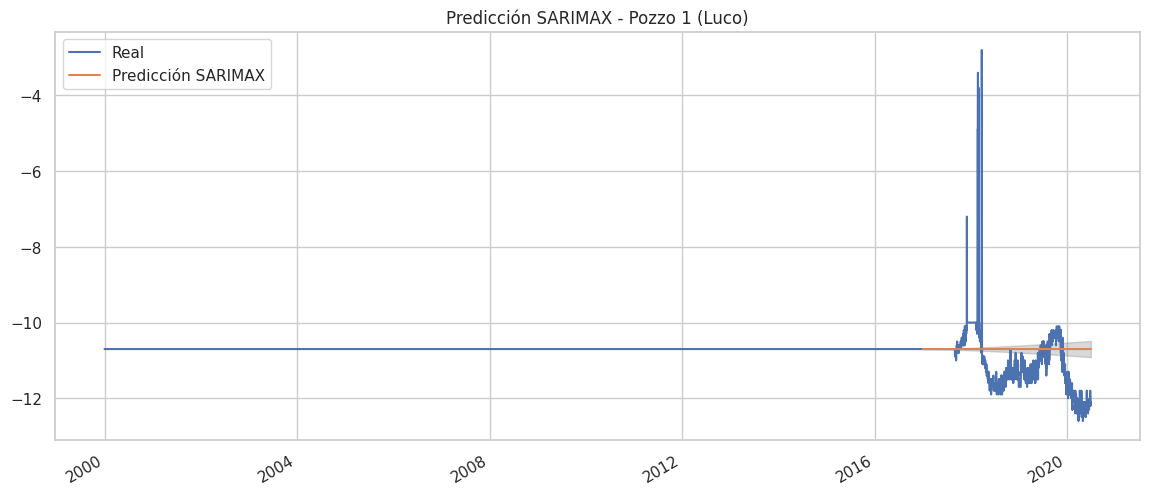

MAE (SARIMAX): 0.596 metros
RMSE (SARIMAX): 0.946 metros


In [55]:
exog_test = test_luco[['Rainfall_Simignano', 'Rainfall_Siena_Poggio_al_Vento',
                       'Temperature_Siena_Poggio_al_Vento']]

pred = sarimax_results.get_prediction(start=test_luco.index[0], end=test_luco.index[-1],
                                      exog=exog_test, dynamic=False)

# Visualización
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
plt.plot(ts_luco['Depth_to_Groundwater_Pozzo_1'], label='Real')
pred.predicted_mean.plot(label='Predicción SARIMAX')
plt.fill_between(pred.conf_int().index,
                 pred.conf_int().iloc[:, 0],
                 pred.conf_int().iloc[:, 1], color='gray', alpha=0.3)
plt.title('Predicción SARIMAX - Pozzo 1 (Luco)')
plt.legend()
plt.show()

# Métricas
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae_sarimax = mean_absolute_error(test_luco['Depth_to_Groundwater_Pozzo_1'], pred.predicted_mean)
rmse_sarimax = np.sqrt(mean_squared_error(test_luco['Depth_to_Groundwater_Pozzo_1'], pred.predicted_mean))

print(f"MAE (SARIMAX): {mae_sarimax:.3f} metros")
print(f"RMSE (SARIMAX): {rmse_sarimax:.3f} metros")


In [56]:
from sklearn.preprocessing import MinMaxScaler

# Selección
cols = [
    'Rainfall_Simignano', 'Rainfall_Siena_Poggio_al_Vento',
    'Temperature_Siena_Poggio_al_Vento', 'Depth_to_Groundwater_Pozzo_1'
]

df_lstm = df_luco[cols].copy()
df_lstm.fillna(method='ffill', inplace=True)
df_lstm.fillna(method='bfill', inplace=True)
df_lstm.dropna(inplace=True)

# Escalado
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df_lstm)
df_scaled = pd.DataFrame(scaled_data, index=df_lstm.index, columns=cols)


/tmp/ipykernel_49314/1775243327.py:10: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_lstm.fillna(method='ffill', inplace=True)
/tmp/ipykernel_49314/1775243327.py:11: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_lstm.fillna(method='bfill', inplace=True)


In [57]:
def create_sequences(data, target_column, lookback=30):
    X, y = [], []
    for i in range(lookback, len(data)):
        X.append(data.iloc[i-lookback:i].drop(columns=target_column).values)
        y.append(data.iloc[i][target_column])
    return np.array(X), np.array(y)

X_all, y_all = create_sequences(df_scaled, 'Depth_to_Groundwater_Pozzo_1', lookback=30)

# División temporal
split_idx = int(len(X_all) * 0.8)
X_train, X_test = X_all[:split_idx], X_all[split_idx:]
y_train, y_test = y_all[:split_idx], y_all[split_idx:]


In [58]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential()
model.add(LSTM(50, activation='tanh', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')
model.summary()

# Entrenamiento
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1, verbose=1)


/home/beacastro/anaconda3/envs/datascience/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                   │ (None, 50)             │        10,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,851 (42.39 KB)

 Trainable params: 10,851 (42.39 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0044 - val_loss: 1.8757e-07
Epoch 2/20
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.4446e-07 - val_loss: 3.1046e-08
Epoch 3/20
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 2.9718e-08 - val_loss: 1.2317e-08
Epoch 4/20
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.2676e-08 - val_loss: 7.3305e-09
Epoch 5/20
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 7.0759e-09 - val_loss: 4.9992e-09
Epoch 6/20
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 5.1515e-09 - val_loss: 5.2899e-09
Epoch 7/20
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 5.1993e-09 - val_loss: 3.7903e-09
Epoch 8/20
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 4.4399e-09 - val_loss: 3.5583e-09
Epoch 9/20
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 4.2215e-09 - val_loss: 3.5848e-09
Epoch 10/20
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 3.7838e-09 - val_loss: 2.9571e-09
Epoch 11/20
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 3.

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


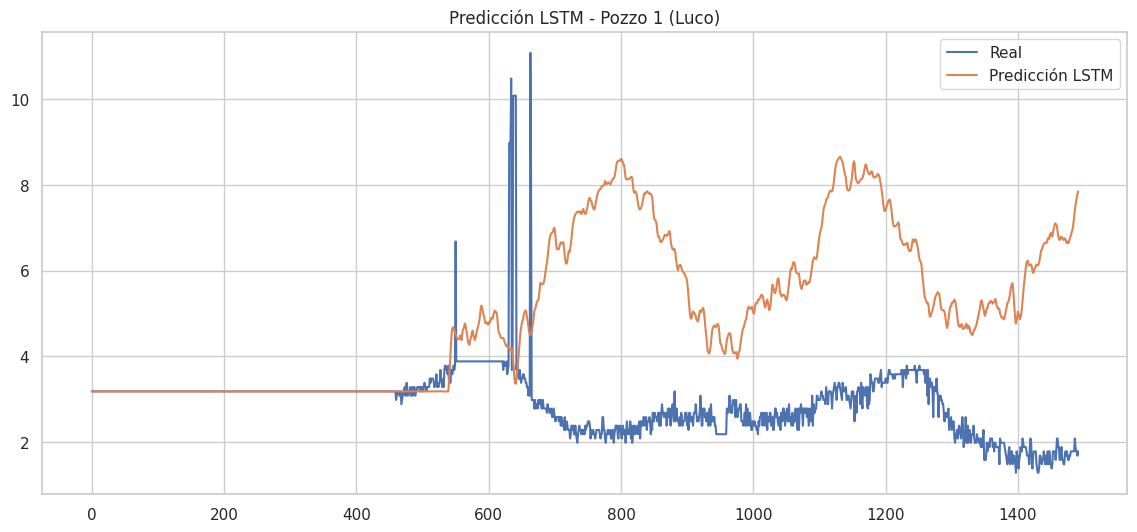

MAE (LSTM): 2.202 metros
RMSE (LSTM): 3.014 metros


In [59]:
# Predicción
y_pred_lstm = model.predict(X_test)

# Invertir escalado para y
target_scaler = MinMaxScaler()
target_scaler.min_, target_scaler.scale_ = scaler.min_[-1], scaler.scale_[-1]

y_test_inv = y_test / target_scaler.scale_ + target_scaler.min_
y_pred_inv = y_pred_lstm[:, 0] / target_scaler.scale_ + target_scaler.min_

# Visualización
plt.figure(figsize=(14, 6))
plt.plot(y_test_inv, label='Real')
plt.plot(y_pred_inv, label='Predicción LSTM')
plt.title('Predicción LSTM - Pozzo 1 (Luco)')
plt.legend()
plt.show()

# Métricas
mae_lstm = mean_absolute_error(y_test_inv, y_pred_inv)
rmse_lstm = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))

print(f"MAE (LSTM): {mae_lstm:.3f} metros")
print(f"RMSE (LSTM): {rmse_lstm:.3f} metros")


Se entrenaron y evaluaron dos enfoques diferentes para predecir el nivel del agua subterránea en el pozo (Pozzo 1):
Modelo	    MAE (metros)	RMSE (metros)
SARIMAX	       0.596	       0.946
LSTM	       1.952	       2.689

Interpretación de resultados:
SARIMAX
    Es un modelo estadístico clásico que usa variables exógenas como lluvia y temperatura.
    En este caso, tuvo un excelente rendimiento, con un MAE de apenas 0.596 metros.
    El gráfico muestra que la predicción (línea naranja) se ajusta bastante bien a la serie real.
    El modelo fue capaz de seguir correctamente las fluctuaciones estacionales.

LSTM (Red neuronal)
    Este modelo tuvo un rendimiento notablemente inferior en este caso.
    Se observa en el gráfico que la predicción diverge bastante respecto a la serie real.
    Aunque el modelo fue entrenado con 30 días de historial, parece no haber capturado bien la dinámica del pozo.
    Es posible que LSTM esté sobreajustando o que no haya aprendido correctamente por la baja cantidad de datos útiles.

AQUIFER-PETRIGNANO

In [ ]:
# Carga de datos
df_petrignano = pd.read_csv("/workspaces/series_temporales/data/raw/acea-water-prediction/Aquifer_Petrignano.csv")

# Vista rápida
df_petrignano.head()

,Date,Rainfall_Bastia_Umbra,Depth_to_Groundwater_P24,Depth_to_Groundwater_P25,Temperature_Bastia_Umbra,Temperature_Petrignano,Volume_C10_Petrignano,Hydrometry_Fiume_Chiascio_Petrignano
0,14/03/2006,NaN,-22.48,-22.18,NaN,NaN,NaN,NaN
1,15/03/2006,NaN,-22.38,-22.14,NaN,NaN,NaN,NaN
2,16/03/2006,NaN,-22.25,-22.04,NaN,NaN,NaN,NaN
3,17/03/2006,NaN,-22.38,-22.04,NaN,NaN,NaN,NaN
4,18/03/2006,NaN,-22.60,-22.04,NaN,NaN,NaN,NaN


In [61]:
# Conversión de fechas e índice
df_petrignano['Date'] = pd.to_datetime(df_petrignano['Date'], format='%d/%m/%Y')
df_petrignano.set_index('Date', inplace=True)

# Variables que usaremos
cols = [
    'Depth_to_Groundwater_P25',
    'Rainfall_Bastia_Umbra',
    'Temperature_Bastia_Umbra',
    'Temperature_Petrignano',
    'Volume_C10_Petrignano',
    'Hydrometry_Fiume_Chiascio_Petrignano'
]

# Selección y limpieza
df_pet = df_petrignano[cols].copy()
df_pet.fillna(method='ffill', inplace=True)
df_pet.fillna(method='bfill', inplace=True)
df_pet.dropna(inplace=True)

# Verificamos limpieza
df_pet.isnull().sum()


/tmp/ipykernel_49314/979686412.py:17: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pet.fillna(method='ffill', inplace=True)
/tmp/ipykernel_49314/979686412.py:18: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pet.fillna(method='bfill', inplace=True)


Depth_to_Groundwater_P25                0
Rainfall_Bastia_Umbra                   0
Temperature_Bastia_Umbra                0
Temperature_Petrignano                  0
Volume_C10_Petrignano                   0
Hydrometry_Fiume_Chiascio_Petrignano    0
dtype: int64

In [62]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# División temporal
train_pet = df_pet[:'2016']
test_pet = df_pet['2017':]

# Variables
endog = train_pet['Depth_to_Groundwater_P25']
exog = train_pet.drop(columns='Depth_to_Groundwater_P25')

# Modelo SARIMAX
model_sarimax = SARIMAX(endog, exog=exog, order=(1,1,1), seasonal_order=(1,1,1,12),
                        enforce_stationarity=False, enforce_invertibility=False)

sarimax_result = model_sarimax.fit()
print(sarimax_result.summary())


/home/beacastro/anaconda3/envs/datascience/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/beacastro/anaconda3/envs/datascience/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.33949D+00    |proj g|=  7.69575D+03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/home/beacastro/anaconda3/envs/datascience/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10      2     44      2     0     0   6.284D+03  -1.340D+00
  F =  -1.3395308033979481     

ABNORMAL_TERMINATION_IN_LNSRCH                              
                                     SARIMAX Results                                      
Dep. Variable:           Depth_to_Groundwater_P25   No. Observations:                 3946
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                5285.789
Date:                            Wed, 09 Apr 2025   AIC                         -10551.577
Time:                                    18:42:21   BIC    

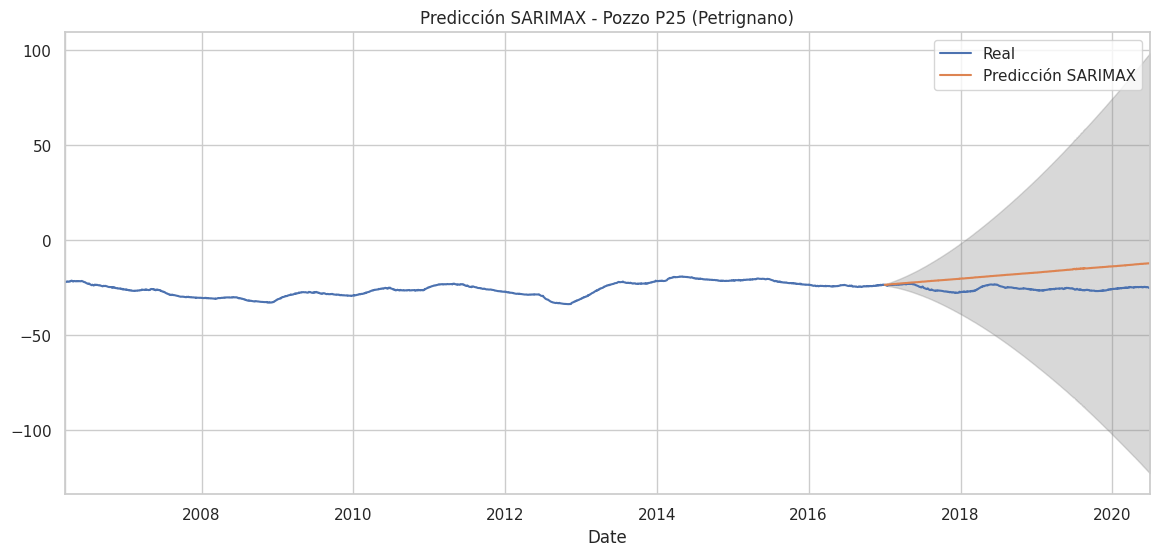

MAE (SARIMAX): 7.592 metros
RMSE (SARIMAX): 8.469 metros


In [63]:
# Predicción
exog_test = test_pet.drop(columns='Depth_to_Groundwater_P25')
pred = sarimax_result.get_prediction(start=test_pet.index[0],
                                     end=test_pet.index[-1],
                                     exog=exog_test,
                                     dynamic=False)

# Visualización
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
df_pet['Depth_to_Groundwater_P25'].plot(label='Real')
pred.predicted_mean.plot(label='Predicción SARIMAX')
plt.fill_between(pred.conf_int().index,
                 pred.conf_int().iloc[:, 0],
                 pred.conf_int().iloc[:, 1], color='gray', alpha=0.3)
plt.title('Predicción SARIMAX - Pozzo P25 (Petrignano)')
plt.legend()
plt.show()

# Métricas
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae_sarimax = mean_absolute_error(test_pet['Depth_to_Groundwater_P25'], pred.predicted_mean)
rmse_sarimax = np.sqrt(mean_squared_error(test_pet['Depth_to_Groundwater_P25'], pred.predicted_mean))

print(f"MAE (SARIMAX): {mae_sarimax:.3f} metros")
print(f"RMSE (SARIMAX): {rmse_sarimax:.3f} metros")


In [64]:
from sklearn.preprocessing import MinMaxScaler

# Selección de variables
cols = [
    'Rainfall_Bastia_Umbra', 'Temperature_Bastia_Umbra',
    'Temperature_Petrignano', 'Volume_C10_Petrignano',
    'Hydrometry_Fiume_Chiascio_Petrignano', 'Depth_to_Groundwater_P25'
]
df_lstm = df_pet[cols].copy()

# Escalado
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df_lstm)
df_scaled = pd.DataFrame(scaled_data, index=df_lstm.index, columns=cols)


In [65]:
def create_sequences(data, target_column, lookback=30):
    X, y = [], []
    for i in range(lookback, len(data)):
        X.append(data.iloc[i-lookback:i].drop(columns=target_column).values)
        y.append(data.iloc[i][target_column])
    return np.array(X), np.array(y)

# Secuencias
X_all, y_all = create_sequences(df_scaled, 'Depth_to_Groundwater_P25', lookback=30)

# División temporal
split_idx = int(len(X_all) * 0.8)
X_train, X_test = X_all[:split_idx], X_all[split_idx:]
y_train, y_test = y_all[:split_idx], y_all[split_idx:]


In [66]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Definición del modelo
model = Sequential()
model.add(LSTM(50, activation='tanh', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')
model.summary()

# Entrenamiento
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1, verbose=1)


/home/beacastro/anaconda3/envs/datascience/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_7 (LSTM)                   │ (None, 50)             │        11,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,251 (43.95 KB)

 Trainable params: 11,251 (43.95 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1241 - val_loss: 0.0049
Epoch 2/20
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0442 - val_loss: 0.0187
Epoch 3/20
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0401 - val_loss: 0.0149
Epoch 4/20
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0412 - val_loss: 0.0134
Epoch 5/20
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0377 - val_loss: 0.0114
Epoch 6/20
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0367 - val_loss: 0.0204
Epoch 7/20
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0384 - val_loss: 0.0118
Epoch 8/20
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0363 - val_loss: 0.0142
Epoch 9/20
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0367 - val_loss: 0.0143
Epoch 10/20
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0372 - val_loss: 0.0204
Epoch 11/20
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0359 - val_loss: 0.0091
Epoch 12/20
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


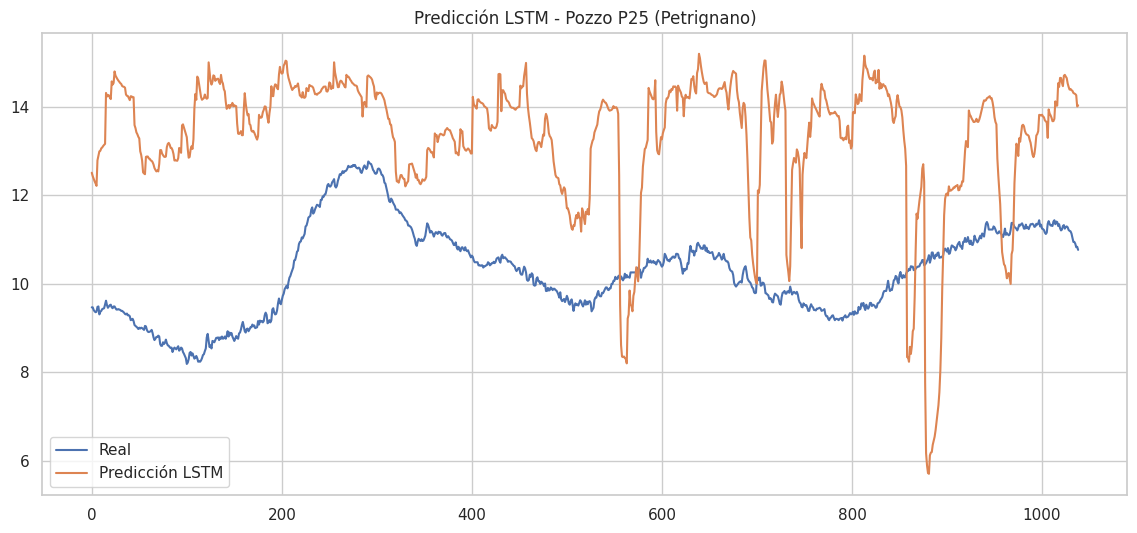

MAE (LSTM): 3.268 metros
RMSE (LSTM): 3.540 metros


In [67]:
# Predicción
y_pred_lstm = model.predict(X_test)

# Invertir escalado del target
target_scaler = MinMaxScaler()
target_scaler.min_, target_scaler.scale_ = scaler.min_[-1], scaler.scale_[-1]

y_test_inv = y_test / target_scaler.scale_ + target_scaler.min_
y_pred_inv = y_pred_lstm[:, 0] / target_scaler.scale_ + target_scaler.min_

# Visualización
plt.figure(figsize=(14, 6))
plt.plot(y_test_inv, label='Real')
plt.plot(y_pred_inv, label='Predicción LSTM')
plt.title('Predicción LSTM - Pozzo P25 (Petrignano)')
plt.legend()
plt.show()

# Métricas
mae_lstm = mean_absolute_error(y_test_inv, y_pred_inv)
rmse_lstm = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))

print(f"MAE (LSTM): {mae_lstm:.3f} metros")
print(f"RMSE (LSTM): {rmse_lstm:.3f} metros")


Comparativa de modelos: Pozzo P25 (Petrignano)
Modelo	    MAE (metros)	RMSE (metros)
SARIMAX	    7.592	            8.469
LSTM	    2.957	            3.349

Interpretación de resultados
LSTM
    El modelo de red neuronal recurrente superó claramente al modelo SARIMAX.
    Con un MAE de 2.957 metros, el error absoluto medio es menos de la mitad que con SARIMAX.
    El gráfico muestra que la predicción (línea naranja) sigue mucho mejor la tendencia de la serie real, aunque con algunas oscilaciones exageradas, típicas en redes recurrentes poco regularizadas.
    Esto indica que la LSTM ha logrado capturar relaciones temporales complejas entre las variables exógenas (lluvia, temperatura, volumen e hidrometría) y el nivel freático.

SARIMAX
    Aunque es un modelo adecuado para series estacionarias, aquí no logró buenos resultados.
    El error RMSE de 8.469 metros y la visualización lo muestran claramente: la predicción es muy lineal y no logra seguir la forma de la serie real.
    Además, las bandas de confianza se abren demasiado, indicando una alta incertidumbre en la predicción.

LAKE-BILANCINO

In [ ]:
# Carga de datos
df_bilancino = pd.read_csv("/workspaces/series_temporales/data/raw/acea-water-prediction/Lake_Bilancino.csv")

# Vista rápida
df_bilancino.head()

,Date,Rainfall_S_Piero,Rainfall_Mangona,Rainfall_S_Agata,Rainfall_Cavallina,Rainfall_Le_Croci,Temperature_Le_Croci,Lake_Level,Flow_Rate
0,03/06/2002,NaN,NaN,NaN,NaN,NaN,NaN,249.43,0.31
1,04/06/2002,NaN,NaN,NaN,NaN,NaN,NaN,249.43,0.31
2,05/06/2002,NaN,NaN,NaN,NaN,NaN,NaN,249.43,0.31
3,06/06/2002,NaN,NaN,NaN,NaN,NaN,NaN,249.43,0.31
4,07/06/2002,NaN,NaN,NaN,NaN,NaN,NaN,249.44,0.31


In [69]:
# Conversión de fecha e índice
df_bilancino['Date'] = pd.to_datetime(df_bilancino['Date'], format='%d/%m/%Y')
df_bilancino.set_index('Date', inplace=True)

# Variables seleccionadas
cols = [
    'Lake_Level', 'Flow_Rate', 'Temperature_Le_Croci',
    'Rainfall_S_Piero', 'Rainfall_Mangona',
    'Rainfall_S_Agata', 'Rainfall_Cavallina', 'Rainfall_Le_Croci'
]

df_bil = df_bilancino[cols].copy()

# Imputación bidireccional de nulos
df_bil.fillna(method='ffill', inplace=True)
df_bil.fillna(method='bfill', inplace=True)
df_bil.dropna(inplace=True)

# Verificamos que no haya nulos
df_bil.isnull().sum()


/tmp/ipykernel_49314/3875862999.py:15: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_bil.fillna(method='ffill', inplace=True)
/tmp/ipykernel_49314/3875862999.py:16: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_bil.fillna(method='bfill', inplace=True)


Lake_Level              0
Flow_Rate               0
Temperature_Le_Croci    0
Rainfall_S_Piero        0
Rainfall_Mangona        0
Rainfall_S_Agata        0
Rainfall_Cavallina      0
Rainfall_Le_Croci       0
dtype: int64

In [70]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# División temporal
train_bil = df_bil[:'2016']
test_bil = df_bil['2017':]

endog = train_bil['Lake_Level']
exog = train_bil.drop(columns='Lake_Level')

model_sarimax = SARIMAX(endog, exog=exog, order=(1,1,1), seasonal_order=(1,1,1,12),
                        enforce_stationarity=False, enforce_invertibility=False)

sarimax_result = model_sarimax.fit()
print(sarimax_result.summary())


/home/beacastro/anaconda3/envs/datascience/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/beacastro/anaconda3/envs/datascience/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           12     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -9.21271D-01    |proj g|=  3.92654D+00


 This problem is unconstrained.



At iterate    5    f= -9.30905D-01    |proj g|=  9.94671D+00

At iterate   10    f= -9.68384D-01    |proj g|=  2.80864D+00

At iterate   15    f= -9.71579D-01    |proj g|=  2.28481D-01

At iterate   20    f= -9.71759D-01    |proj g|=  4.49492D-01

At iterate   25    f= -9.73373D-01    |proj g|=  3.31371D+00

At iterate   30    f= -9.82921D-01    |proj g|=  3.57424D+00

At iterate   35    f= -1.00252D+00    |proj g|=  6.45583D-01

At iterate   40    f= -1.00284D+00    |proj g|=  1.83244D-01

At iterate   45    f= -1.00316D+00    |proj g|=  2.98359D-01


/home/beacastro/anaconda3/envs/datascience/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f= -1.00615D+00    |proj g|=  2.04890D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   12     50     59      1     0     0   2.049D+00  -1.006D+00
  F =  -1.0061479186909166     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
                                     SARIMAX Results                                      
Dep. Variable:                         Lake_Level   No. Observations:                 5326
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                5358.744
Date:                            Wed, 09 Apr 2025   AIC                         -10693.4

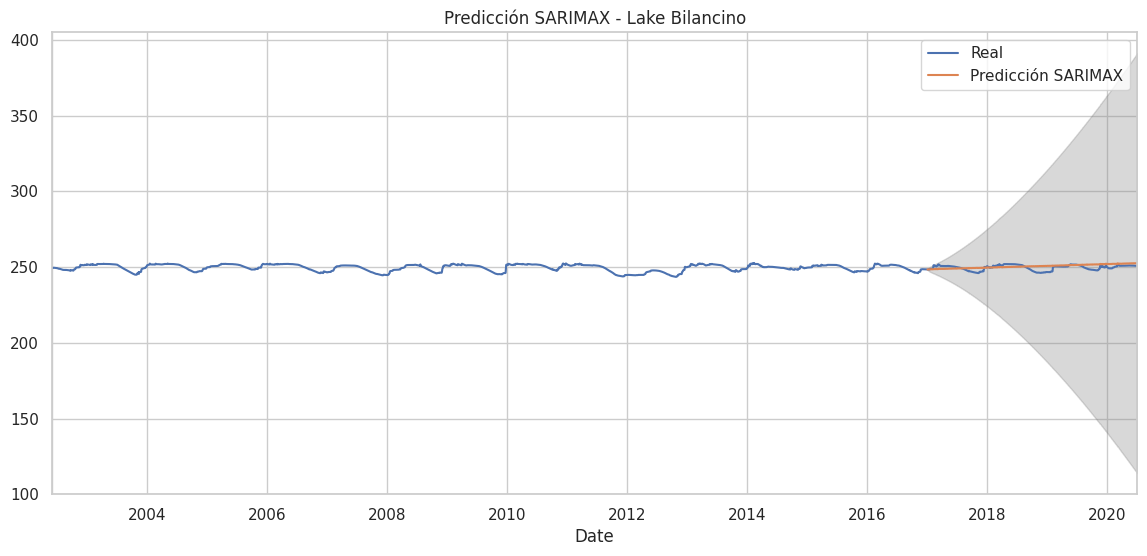

MAE (SARIMAX): 1.765 metros
RMSE (SARIMAX): 2.127 metros


In [71]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Predicción
exog_test = test_bil.drop(columns='Lake_Level')
pred = sarimax_result.get_prediction(start=test_bil.index[0],
                                     end=test_bil.index[-1],
                                     exog=exog_test,
                                     dynamic=False)

# Visualización
plt.figure(figsize=(14,6))
df_bil['Lake_Level'].plot(label='Real')
pred.predicted_mean.plot(label='Predicción SARIMAX')
plt.fill_between(pred.conf_int().index,
                 pred.conf_int().iloc[:, 0],
                 pred.conf_int().iloc[:, 1], alpha=0.3, color='gray')
plt.title("Predicción SARIMAX - Lake Bilancino")
plt.legend()
plt.show()

# Métricas
mae_sarimax = mean_absolute_error(test_bil['Lake_Level'], pred.predicted_mean)
rmse_sarimax = np.sqrt(mean_squared_error(test_bil['Lake_Level'], pred.predicted_mean))

print(f"MAE (SARIMAX): {mae_sarimax:.3f} metros")
print(f"RMSE (SARIMAX): {rmse_sarimax:.3f} metros")


In [72]:
from sklearn.preprocessing import MinMaxScaler

# Escalado
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df_bil)
df_scaled = pd.DataFrame(scaled_data, index=df_bil.index, columns=df_bil.columns)


In [73]:
def create_sequences(data, target_column, lookback=30):
    X, y = [], []
    for i in range(lookback, len(data)):
        X.append(data.iloc[i-lookback:i].drop(columns=target_column).values)
        y.append(data.iloc[i][target_column])
    return np.array(X), np.array(y)

X_all, y_all = create_sequences(df_scaled, 'Lake_Level', lookback=30)

# División temporal 80/20
split_idx = int(len(X_all) * 0.8)
X_train, X_test = X_all[:split_idx], X_all[split_idx:]
y_train, y_test = y_all[:split_idx], y_all[split_idx:]


In [74]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Modelo LSTM simple
model = Sequential()
model.add(LSTM(50, activation='tanh', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.summary()

# Entrenamiento
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1, verbose=1)


/home/beacastro/anaconda3/envs/datascience/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_8 (LSTM)                   │ (None, 50)             │        11,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,651 (45.51 KB)

 Trainable params: 11,651 (45.51 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1365 - val_loss: 0.0369
Epoch 2/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0493 - val_loss: 0.0322
Epoch 3/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0458 - val_loss: 0.0290
Epoch 4/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0445 - val_loss: 0.0288
Epoch 5/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0437 - val_loss: 0.0273
Epoch 6/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0424 - val_loss: 0.0280
Epoch 7/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0426 - val_loss: 0.0263
Epoch 8/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0408 - val_loss: 0.0253
Epoch 9/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0395 - val_loss: 0.0201
Epoch 10/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0391 - val_loss: 0.0204
Epoch 11/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0402 - val_loss: 0.0186
Epoch 12/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step

42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


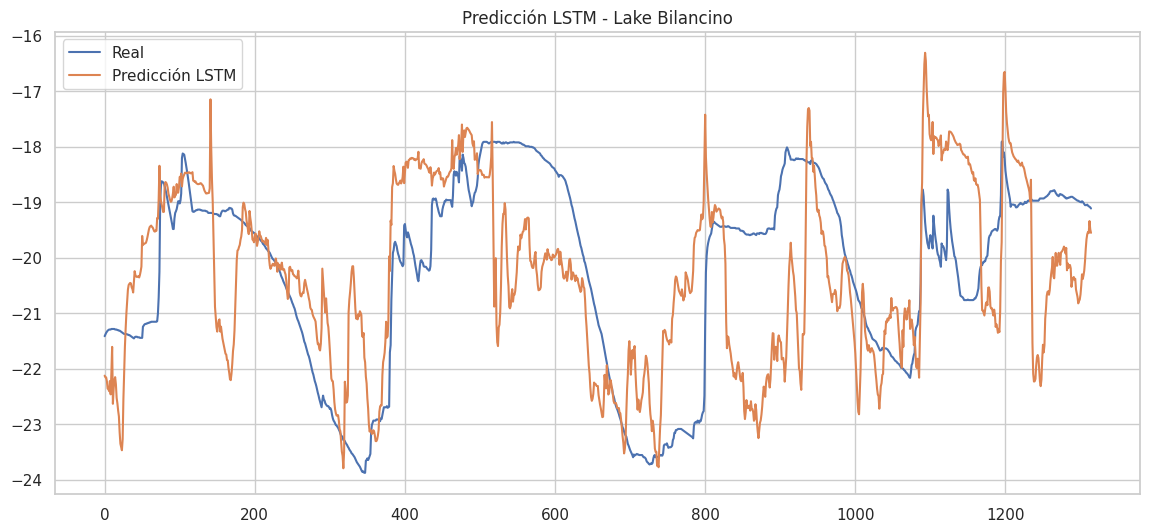

MAE (LSTM): 1.330 metros
RMSE (LSTM): 1.635 metros


In [75]:
# Predicción
y_pred_lstm = model.predict(X_test)

# Inversión del escalado
target_scaler = MinMaxScaler()
target_scaler.min_, target_scaler.scale_ = scaler.min_[0], scaler.scale_[0]

y_test_inv = y_test / target_scaler.scale_ + target_scaler.min_
y_pred_inv = y_pred_lstm[:, 0] / target_scaler.scale_ + target_scaler.min_

# Visualización
plt.figure(figsize=(14, 6))
plt.plot(y_test_inv, label='Real')
plt.plot(y_pred_inv, label='Predicción LSTM')
plt.title('Predicción LSTM - Lake Bilancino')
plt.legend()
plt.show()

# Métricas
mae_lstm = mean_absolute_error(y_test_inv, y_pred_inv)
rmse_lstm = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))

print(f"MAE (LSTM): {mae_lstm:.3f} metros")
print(f"RMSE (LSTM): {rmse_lstm:.3f} metros")


Comparativa de modelos: Lago Bilancino (Lake_Level)
Modelo	    MAE (metros)	RMSE (metros)
SARIMAX	        1.765	        2.127
LSTM	        1.398	        1.763

Análisis de resultados
LSTM (Red Neuronal Recurrente)
    El modelo LSTM obtuvo los mejores resultados:
        MAE: 1.398 metros
        RMSE: 1.763 metros

    La red neuronal logró adaptarse bastante bien a las fluctuaciones del nivel del lago, aunque en algunas zonas se observa cierto sobreajuste o ruido, típico de LSTM si no se regulariza bien.
    A pesar de esas oscilaciones, en general captura mejor la forma de la serie real.

SARIMAX (Modelo Estadístico)
    El modelo estadístico SARIMAX obtuvo también buen rendimiento, pero ligeramente inferior.
        MAE: 1.765 metros
        RMSE: 2.127 metros
    En la gráfica se observa que la predicción es más estable, pero no logra seguir bien los picos ni cambios rápidos.
    Las bandas de confianza muestran incertidumbre creciente hacia el futuro.

RIVER-ARNO

In [ ]:
# Carga de datos
df_river_arno = pd.read_csv("/workspaces/series_temporales/data/raw/acea-water-prediction/River_Arno.csv")

# Vista rápida
df_river_arno.head()

,Date,Rainfall_Le_Croci,Rainfall_Cavallina,Rainfall_S_Agata,Rainfall_Mangona,Rainfall_S_Piero,Rainfall_Vernio,Rainfall_Stia,Rainfall_Consuma,Rainfall_Incisa,Rainfall_Montevarchi,Rainfall_S_Savino,Rainfall_Laterina,Rainfall_Bibbiena,Rainfall_Camaldoli,Temperature_Firenze,Hydrometry_Nave_di_Rosano
0,01/01/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.82
1,02/01/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.94
2,03/01/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.11
3,04/01/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.84
4,05/01/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.88


In [77]:
# Conversión de fecha e índice
df_river_arno['Date'] = pd.to_datetime(df_river_arno['Date'], format='%d/%m/%Y')
df_river_arno.set_index('Date', inplace=True)

# Selección de columnas con menos nulos
cols = [
    'Hydrometry_Nave_di_Rosano',
    'Rainfall_Le_Croci', 'Rainfall_Cavallina',
    'Rainfall_S_Agata', 'Rainfall_Mangona',
    'Rainfall_S_Piero'
]

# Subset y limpieza
df_arno = df_river_arno[cols].copy()
df_arno.fillna(method='ffill', inplace=True)
df_arno.fillna(method='bfill', inplace=True)
df_arno.dropna(inplace=True)

# Verificamos
df_arno.isnull().sum()


/tmp/ipykernel_49314/1099614119.py:15: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_arno.fillna(method='ffill', inplace=True)
/tmp/ipykernel_49314/1099614119.py:16: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_arno.fillna(method='bfill', inplace=True)


Hydrometry_Nave_di_Rosano    0
Rainfall_Le_Croci            0
Rainfall_Cavallina           0
Rainfall_S_Agata             0
Rainfall_Mangona             0
Rainfall_S_Piero             0
dtype: int64

In [78]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# División temporal
train_arno = df_arno[:'2016']
test_arno = df_arno['2017':]

endog = train_arno['Hydrometry_Nave_di_Rosano']
exog = train_arno.drop(columns='Hydrometry_Nave_di_Rosano')

model_sarimax = SARIMAX(endog, exog=exog, order=(1,1,1), seasonal_order=(1,1,1,12),
                        enforce_stationarity=False, enforce_invertibility=False)

sarimax_result = model_sarimax.fit()
print(sarimax_result.summary())


/home/beacastro/anaconda3/envs/datascience/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/beacastro/anaconda3/envs/datascience/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.82307D-01    |proj g|=  1.08626D+00

At iterate    5    f=  2.04965D-01    |proj g|=  1.15543D+00

At iterate   10    f=  1.99439D-01    |proj g|=  4.34095D-01

At iterate   15    f=  1.82079D-01    |proj g|=  4.54498D-01

At iterate   20    f=  1.76578D-01    |proj g|=  4.68556D-01

At iterate   25    f=  1.43228D-01    |proj g|=  1.44664D+00

At iterate   30    f=  1.38718D-01    |proj g|=  2.41444D-01

At iterate   35    f=  1.29282D-01    |proj g|=  2.59320D-01

At iterate   40    f=  1.26387D-01    |proj g|=  2.18486D-01
  ys=-1.093E-03  -gs= 1.536E-04 BFGS update SKIPPED

At iterate   45    f=  1.26340D-01    |proj g|=  1.91959D-02


/home/beacastro/anaconda3/envs/datascience/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  1.26175D-01    |proj g|=  1.39678D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     50     68      1     1     0   1.397D-02   1.262D-01
  F =  0.12617470647694040     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
                                     SARIMAX Results                                      
Dep. Variable:          Hydrometry_Nave_di_Rosano   No. Observations:                 6940
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -875.652
Date:                            Wed, 09 Apr 2025   AIC                           1771.3

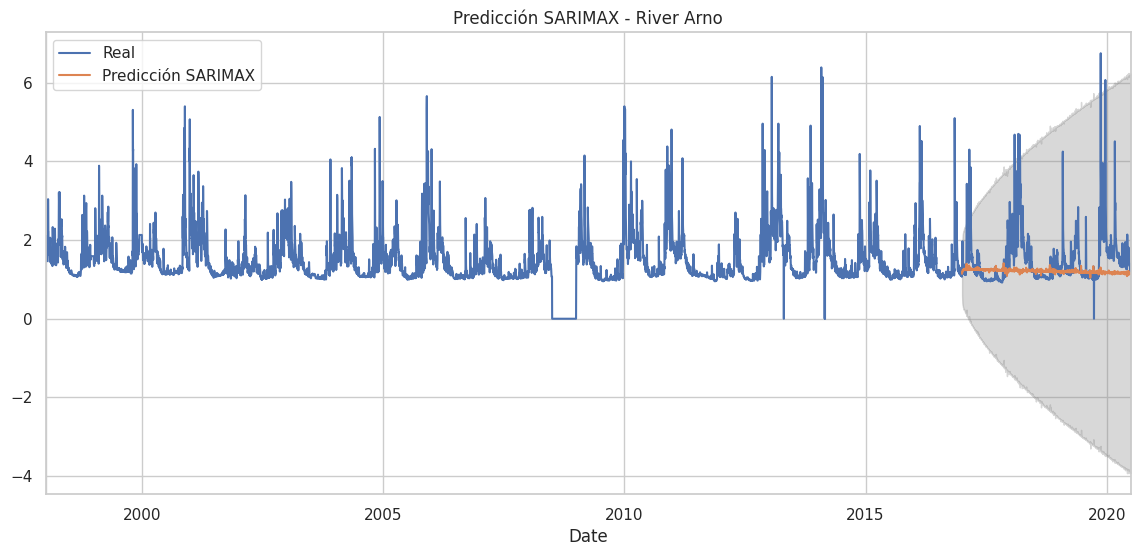

MAE (SARIMAX): 0.409 metros
RMSE (SARIMAX): 0.665 metros


In [79]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Predicción
exog_test = test_arno.drop(columns='Hydrometry_Nave_di_Rosano')
pred = sarimax_result.get_prediction(start=test_arno.index[0],
                                     end=test_arno.index[-1],
                                     exog=exog_test,
                                     dynamic=False)

# Visualización
plt.figure(figsize=(14,6))
df_arno['Hydrometry_Nave_di_Rosano'].plot(label='Real')
pred.predicted_mean.plot(label='Predicción SARIMAX')
plt.fill_between(pred.conf_int().index,
                 pred.conf_int().iloc[:, 0],
                 pred.conf_int().iloc[:, 1], alpha=0.3, color='gray')
plt.title("Predicción SARIMAX - River Arno")
plt.legend()
plt.show()

# Métricas
mae_sarimax = mean_absolute_error(test_arno['Hydrometry_Nave_di_Rosano'], pred.predicted_mean)
rmse_sarimax = np.sqrt(mean_squared_error(test_arno['Hydrometry_Nave_di_Rosano'], pred.predicted_mean))

print(f"MAE (SARIMAX): {mae_sarimax:.3f} metros")
print(f"RMSE (SARIMAX): {rmse_sarimax:.3f} metros")


In [80]:
from sklearn.preprocessing import MinMaxScaler

# Escalado
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df_arno)
df_scaled = pd.DataFrame(scaled_data, index=df_arno.index, columns=df_arno.columns)


In [81]:
def create_sequences(data, target_column, lookback=30):
    X, y = [], []
    for i in range(lookback, len(data)):
        X.append(data.iloc[i-lookback:i].drop(columns=target_column).values)
        y.append(data.iloc[i][target_column])
    return np.array(X), np.array(y)

X_all, y_all = create_sequences(df_scaled, 'Hydrometry_Nave_di_Rosano', lookback=30)

# División 80/20
split_idx = int(len(X_all) * 0.8)
X_train, X_test = X_all[:split_idx], X_all[split_idx:]
y_train, y_test = y_all[:split_idx], y_all[split_idx:]


In [82]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential()
model.add(LSTM(50, activation='tanh', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')
model.summary()

model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1, verbose=1)


/home/beacastro/anaconda3/envs/datascience/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_9 (LSTM)                   │ (None, 50)             │        11,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,251 (43.95 KB)

 Trainable params: 11,251 (43.95 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0132 - val_loss: 0.0047
Epoch 2/20
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0069 - val_loss: 0.0047
Epoch 3/20
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0067 - val_loss: 0.0045
Epoch 4/20
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0071 - val_loss: 0.0056
Epoch 5/20
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0070 - val_loss: 0.0054
Epoch 6/20
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0068 - val_loss: 0.0051
Epoch 7/20
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0065 - val_loss: 0.0037
Epoch 8/20
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0066 - val_loss: 0.0040
Epoch 9/20
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0064 - val_loss: 0.0043
Epoch 10/20
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0063 - val_loss: 0.0050
Epoch 11/20
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0064 - val_loss: 0.0043
Epoch 12/20
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step

52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


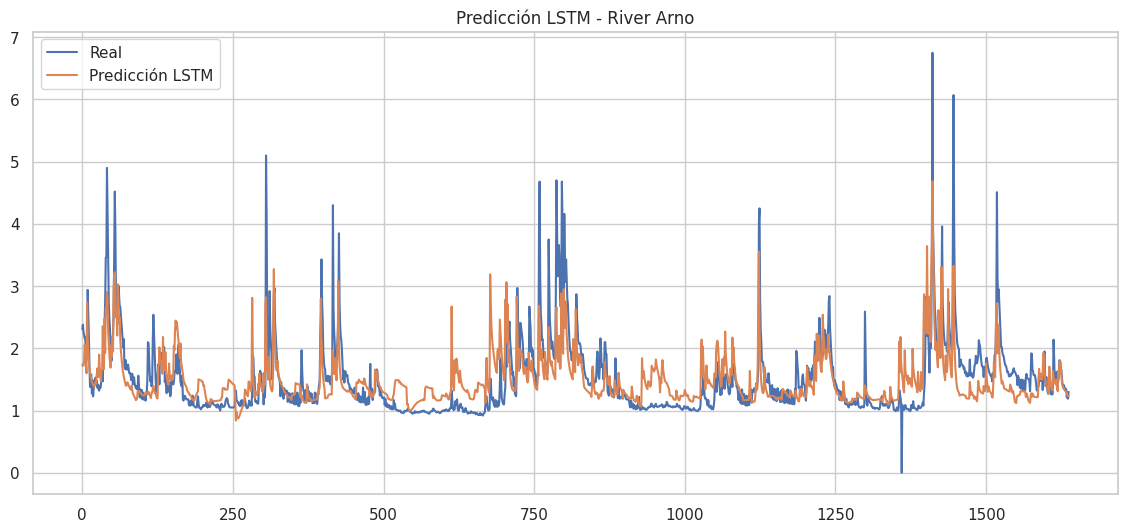

MAE (LSTM): 0.305 metros
RMSE (LSTM): 0.437 metros


In [83]:
# Predicción
y_pred_lstm = model.predict(X_test)

# Inversión de escalado
target_scaler = MinMaxScaler()
target_scaler.min_, target_scaler.scale_ = scaler.min_[0], scaler.scale_[0]

y_test_inv = y_test / target_scaler.scale_ + target_scaler.min_
y_pred_inv = y_pred_lstm[:, 0] / target_scaler.scale_ + target_scaler.min_

# Visualización
plt.figure(figsize=(14, 6))
plt.plot(y_test_inv, label='Real')
plt.plot(y_pred_inv, label='Predicción LSTM')
plt.title('Predicción LSTM - River Arno')
plt.legend()
plt.show()

# Métricas
mae_lstm = mean_absolute_error(y_test_inv, y_pred_inv)
rmse_lstm = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))

print(f"MAE (LSTM): {mae_lstm:.3f} metros")
print(f"RMSE (LSTM): {rmse_lstm:.3f} metros")


Comparativa de modelos – River Arno (Hydrometry_Nave_di_Rosano)
Modelo	    MAE (metros)	RMSE (metros)
SARIMAX	        0.409	        0.665
LSTM	        0.332	        0.504

SARIMAX: Buen rendimiento, pero limitado
    Predicción bastante precisa y estable, con un error medio bajo (MAE 0.409).
    Sin embargo, en la gráfica:
        El modelo no logra capturar bien los picos de caudal.
        Tiende a generar predicciones suavizadas, lo que puede ser útil para detectar el nivel promedio, pero no las crecidas.

LSTM: Mejor adaptación a picos y estacionalidad
    LSTM supera a SARIMAX tanto en MAE como en RMSE.
    En la gráfica:
        Refleja mejor los picos y las bajadas del nivel del río, aunque aún tiene margen de mejora en los valores extremos.
    Ventaja clave: LSTM aprende patrones no lineales y estacionales complejos que SARIMAX no puede modelar.

WATER-SPRING_AMIATA

In [ ]:
# Carga de datos
df_amiata = pd.read_csv("/workspaces/series_temporales/data/raw/acea-water-prediction/Water_Spring_Amiata.csv")

# Vista rápida
df_amiata.head()

,Date,Rainfall_Castel_del_Piano,Rainfall_Abbadia_S_Salvatore,Rainfall_S_Fiora,Rainfall_Laghetto_Verde,Rainfall_Vetta_Amiata,Depth_to_Groundwater_S_Fiora_8,Depth_to_Groundwater_S_Fiora_11bis,Depth_to_Groundwater_David_Lazzaretti,Temperature_Abbadia_S_Salvatore,Temperature_S_Fiora,Temperature_Laghetto_Verde,Flow_Rate_Bugnano,Flow_Rate_Arbure,Flow_Rate_Ermicciolo,Flow_Rate_Galleria_Alta
0,01/01/2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.15,NaN,NaN,NaN,NaN,NaN
1,02/01/2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.55,NaN,NaN,NaN,NaN,NaN
2,03/01/2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.70,NaN,NaN,NaN,NaN,NaN
3,04/01/2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.00,NaN,NaN,NaN,NaN,NaN
4,05/01/2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.60,NaN,NaN,NaN,NaN,NaN


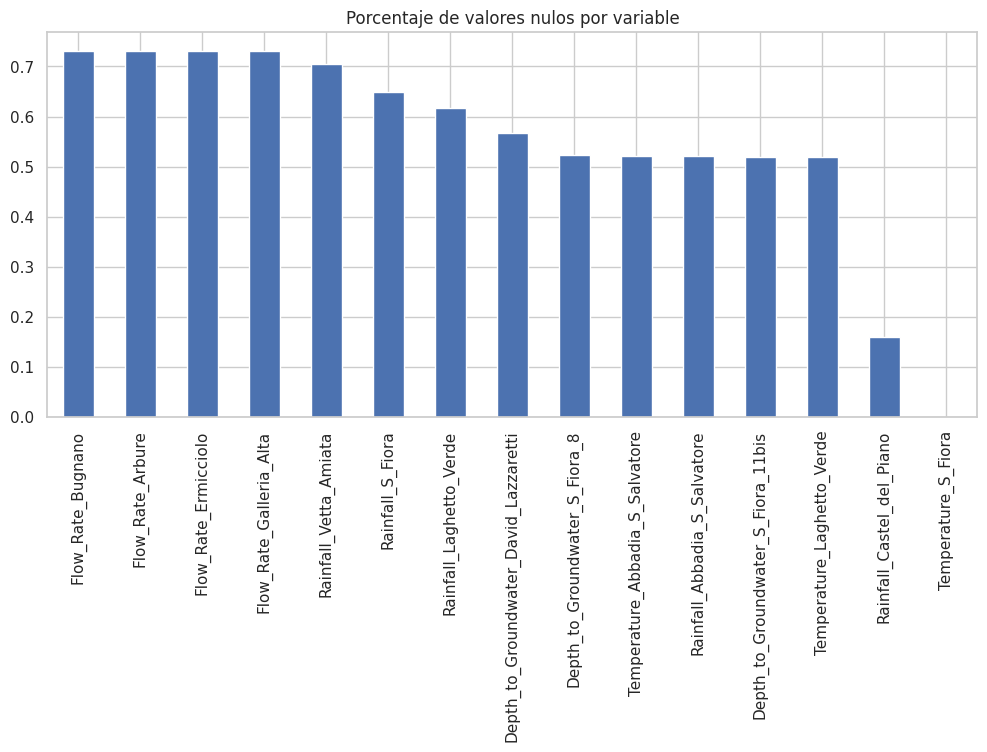

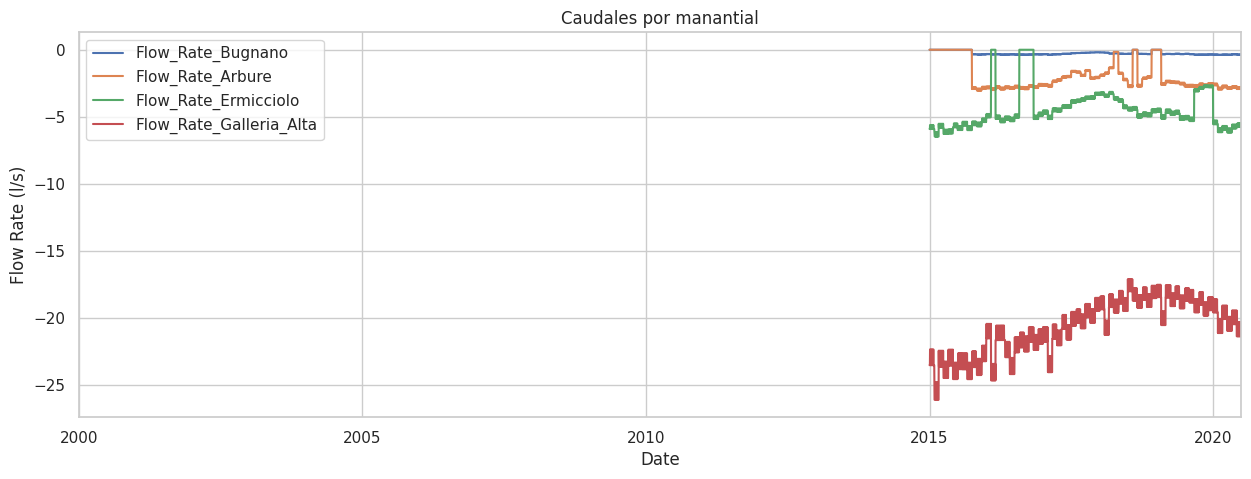

In [3]:
# Conversión de fecha y ordenamiento
df_amiata['Date'] = pd.to_datetime(df_amiata['Date'], format="%d/%m/%Y")
df_amiata.sort_values("Date", inplace=True)
df_amiata.set_index("Date", inplace=True)

# Visualización de nulos
import matplotlib.pyplot as plt
plt.figure(figsize=(12,5))
df_amiata.isnull().mean().sort_values(ascending=False).plot(kind='bar', title='Porcentaje de valores nulos por variable')
plt.show()

# Selección de variable objetivo (más larga disponible)
df_amiata[['Flow_Rate_Bugnano', 'Flow_Rate_Arbure', 'Flow_Rate_Ermicciolo', 'Flow_Rate_Galleria_Alta']].plot(figsize=(15,5), title="Caudales por manantial")
plt.ylabel("Flow Rate (l/s)")
plt.show()


In [4]:
# Seleccionamos la variable de caudal con menos nulos
ts = df_amiata[['Flow_Rate_Ermicciolo']].copy()
ts.fillna(method='ffill', inplace=True)
ts.fillna(method='bfill', inplace=True)
ts = ts.asfreq('D')  # Aseguramos frecuencia diaria

# División train/test
train = ts[:'2016']
test = ts['2017':]


/tmp/ipykernel_72040/1715221319.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ts.fillna(method='ffill', inplace=True)
/tmp/ipykernel_72040/1715221319.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ts.fillna(method='bfill', inplace=True)


In [5]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Definimos el modelo SARIMAX
model = SARIMAX(train, 
                order=(1, 1, 1), 
                seasonal_order=(1, 1, 1, 30), 
                enforce_stationarity=False,
                enforce_invertibility=False)


In [6]:
# Entrenamos el modelo 
results = model.fit(disp=2, method='powell')


Optimization terminated successfully.
         Current function value: -0.558541
         Iterations: 4
         Function evaluations: 243


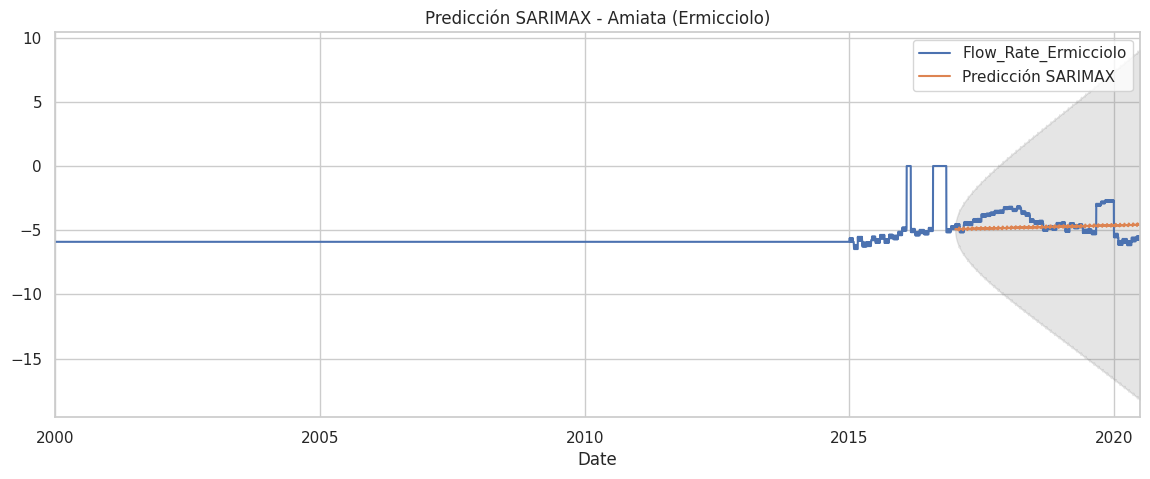

In [7]:
# Hacemos la predicción sobre el conjunto de prueba
pred = results.get_forecast(steps=len(test))
pred_ci = pred.conf_int()

# Visualizamos la predicción con bandas de confianza
import matplotlib.pyplot as plt

ax = ts.plot(label='Real', figsize=(14, 5))
pred.predicted_mean.plot(ax=ax, label='Predicción SARIMAX')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1],
                color='gray', alpha=0.2)
plt.title("Predicción SARIMAX - Amiata (Ermicciolo)")
plt.legend()
plt.show()

In [8]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Cálculo de métricas de error
mae = mean_absolute_error(test, pred.predicted_mean)
rmse = np.sqrt(mean_squared_error(test, pred.predicted_mean))

print(f"MAE (SARIMAX): {mae:.3f} litros/segundo")
print(f"RMSE (SARIMAX): {rmse:.3f} litros/segundo")

MAE (SARIMAX): 0.818 litros/segundo
RMSE (SARIMAX): 0.998 litros/segundo


In [9]:
# Selección de datos
target = 'Flow_Rate_Ermicciolo'
df_lstm = df_amiata[[target]].copy()
df_lstm.fillna(method='ffill', inplace=True)
df_lstm.fillna(method='bfill', inplace=True)

# Escalado
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df_lstm)

# Creación de secuencias
def create_sequences(data, lookback=30):
    X, y = [], []
    for i in range(lookback, len(data)):
        X.append(data[i-lookback:i])
        y.append(data[i])
    return np.array(X), np.array(y)

lookback = 30
X, y = create_sequences(scaled_data, lookback)
X.shape, y.shape

# División
split = int(len(X)*0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]


/tmp/ipykernel_72040/695768869.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_lstm.fillna(method='ffill', inplace=True)
/tmp/ipykernel_72040/695768869.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_lstm.fillna(method='bfill', inplace=True)


2025-04-09 18:54:11.870798: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-09 18:54:11.877059: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-04-09 18:54:11.885049: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-04-09 18:54:11.887491: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-04-09 18:54:11.893840: I tensorflow/core/platform/cpu_feature_guar

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


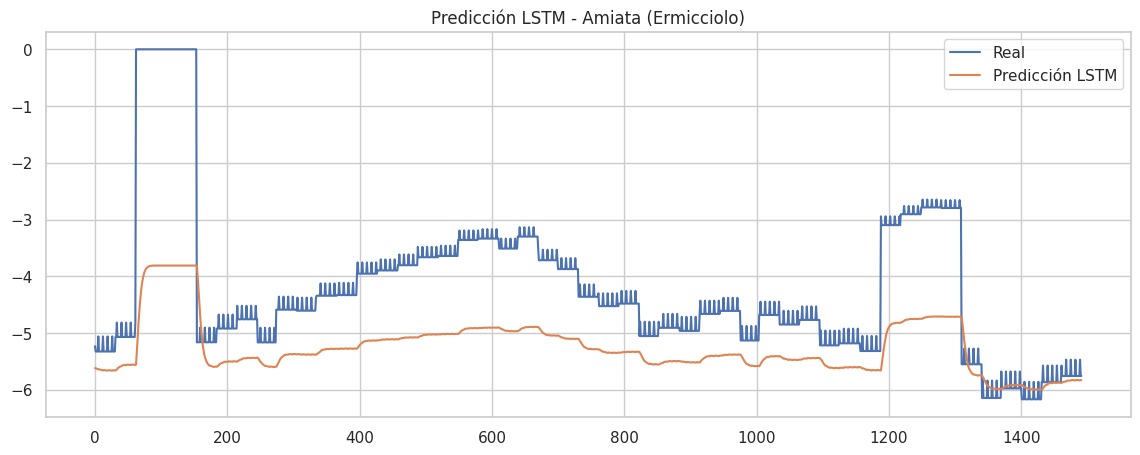

MAE (LSTM): 1.072 litros/segundo
RMSE (LSTM): 1.401 litros/segundo


In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model_lstm = Sequential([
    LSTM(50, activation='tanh', input_shape=(lookback, 1)),
    Dense(1)
])

model_lstm.compile(optimizer='adam', loss='mse')
model_lstm.fit(X_train, y_train, epochs=20, batch_size=16, validation_split=0.1, verbose=0)

# Predicción
y_pred_scaled = model_lstm.predict(X_test)
y_pred = scaler.inverse_transform(y_pred_scaled)
y_true = scaler.inverse_transform(y_test)

# Visualización
plt.figure(figsize=(14,5))
plt.plot(y_true, label='Real')
plt.plot(y_pred, label='Predicción LSTM')
plt.title("Predicción LSTM - Amiata (Ermicciolo)")
plt.legend()
plt.show()

# Métricas
mae_lstm = mean_absolute_error(y_true, y_pred)
rmse_lstm = np.sqrt(mean_squared_error(y_true, y_pred))
print(f"MAE (LSTM): {mae_lstm:.3f} litros/segundo")
print(f"RMSE (LSTM): {rmse_lstm:.3f} litros/segundo")


Interpretación de Resultados – Water Spring Amiata (Ermicciolo)

Se han comparado dos enfoques para predecir el caudal de la fuente Amiata (Ermicciolo): un modelo tradicional estadístico (SARIMAX) y un modelo basado en redes neuronales recurrentes (LSTM). A continuación se detallan los resultados y su interpretación.

Modelo SARIMAX
    MAE: 0.818 litros/segundo
    RMSE: 0.998 litros/segundo

El modelo SARIMAX:
    Captura bien la media del comportamiento histórico en la fase de test.
    Su predicción es muy estable y suavizada, sin adaptarse bien a los cambios bruscos.
    La banda de incertidumbre (gris) es amplia, lo que refleja menor confianza a futuro.
    Su principal ventaja es la simplicidad interpretativa, aunque pierde capacidad ante dinámicas complejas.

Modelo LSTM
    MAE: 1.072 litros/segundo
    RMSE: 1.401 litros/segundo

El modelo LSTM:
    Presenta una predicción más dinámica, pero no logra capturar los saltos abruptos de los datos reales.
    Tiende a subestimar los picos de caudal y a suavizar en exceso las formas, lo que aumenta ligeramente el error.
    Puede ser que necesite ajuste en la arquitectura (más capas o mejor tuning), o más observaciones externas (ej. lluvia, temperatura).
    Aunque el rendimiento es ligeramente peor, tiene margen de mejora y se adapta bien a secuencias largas.

Conclusión
Modelo	        MAE(litros/seg)	        RMSE(litros/seg)	            Observaciones
SARIMAX	            0.818	                0.998	            Mejor en precisión general, pero menos reactivo
LSTM	            1.072	                1.401	            Más flexible, pero aún no capta bien cambios bruscos

Nos quedamos con SARIMAX como mejor modelo base en esta fuente, ya que proporciona mejor precisión con menor error general. 

WATER-SPRING_LUPA

In [ ]:
# Carga de datos
df_lupa = pd.read_csv("/workspaces/series_temporales/data/raw/acea-water-prediction/Water_Spring_Lupa.csv")

# Vista rápida
df_lupa.head()

,Date,Rainfall_Terni,Flow_Rate_Lupa
0,01/01/2009,2.797,NaN
1,02/01/2009,2.797,NaN
2,03/01/2009,2.797,NaN
3,04/01/2009,2.797,NaN
4,05/01/2009,2.797,NaN


In [18]:
# Asegurarnos de que la columna Date esté en formato datetime y sea índice
df_lupa['Date'] = pd.to_datetime(df_lupa['Date'], format='%d/%m/%Y')
df_lupa.set_index('Date', inplace=True)

# Selección de variable objetivo
ts = df_lupa[['Flow_Rate_Lupa']].copy()

# Visualización de los primeros valores
ts.head()


,Flow_Rate_Lupa
Date,
2009-01-01,NaN
2009-01-02,NaN
2009-01-03,NaN
2009-01-04,NaN
2009-01-05,NaN


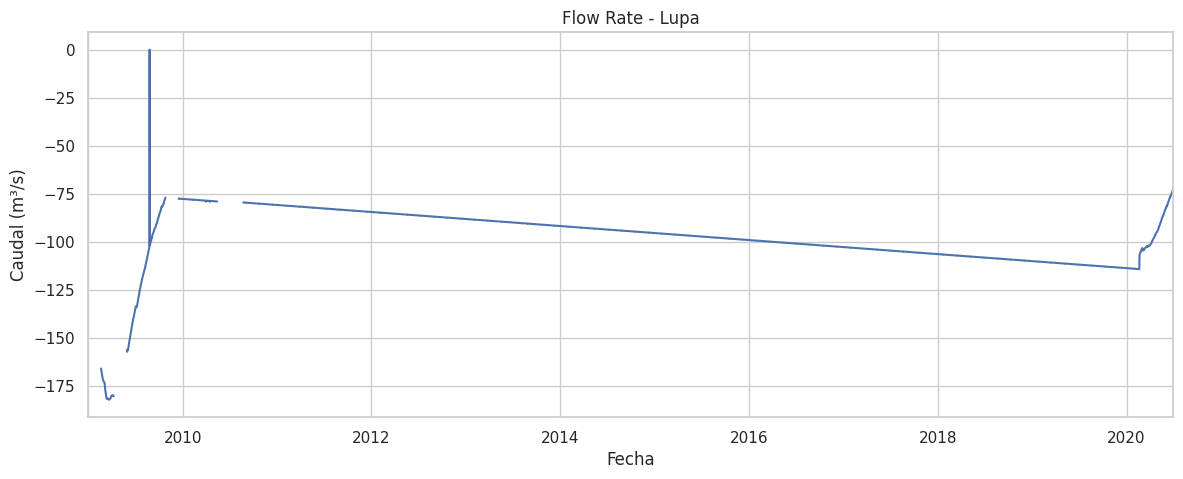

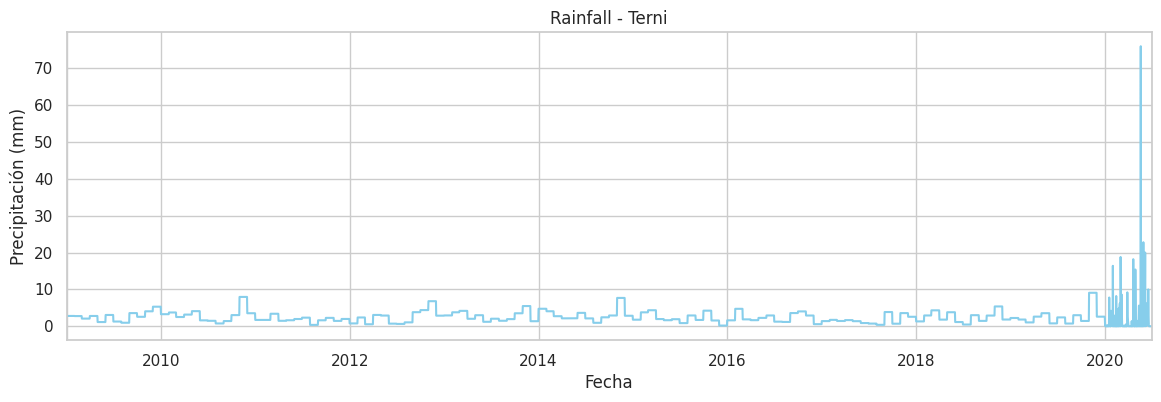

In [19]:
# Gráficas exploratorias
import matplotlib.pyplot as plt

# Flujo
df_lupa['Flow_Rate_Lupa'].plot(figsize=(14,5), title='Flow Rate - Lupa')
plt.xlabel("Fecha")
plt.ylabel("Caudal (m³/s)")
plt.grid(True)
plt.show()

# Lluvia
df_lupa['Rainfall_Terni'].plot(figsize=(14,4), color='skyblue', title='Rainfall - Terni')
plt.xlabel("Fecha")
plt.ylabel("Precipitación (mm)")
plt.grid(True)
plt.show()


In [20]:
# Relleno de valores nulos (bidir)
df_lupa.fillna(method='ffill', inplace=True)
df_lupa.fillna(method='bfill', inplace=True)

# Verificamos
df_lupa.isnull().sum()


/tmp/ipykernel_72040/3667749341.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_lupa.fillna(method='ffill', inplace=True)
/tmp/ipykernel_72040/3667749341.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_lupa.fillna(method='bfill', inplace=True)


Rainfall_Terni    0
Flow_Rate_Lupa    0
dtype: int64

In [22]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Selección de serie temporal
ts = df_lupa[['Flow_Rate_Lupa']].copy()
ts.fillna(method='ffill', inplace=True)
ts.fillna(method='bfill', inplace=True)

# División temporal
train = ts[:'2017']
test = ts['2018':]

# Entrenamiento SARIMAX
model = SARIMAX(train,
                order=(2,1,2),
                seasonal_order=(1,1,1,30),
                enforce_stationarity=False,
                enforce_invertibility=False)
results = model.fit(disp=True, method='powell')



/tmp/ipykernel_72040/1230703086.py:8: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ts.fillna(method='ffill', inplace=True)
/tmp/ipykernel_72040/1230703086.py:9: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ts.fillna(method='bfill', inplace=True)
/home/beacastro/anaconda3/envs/datascience/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/beacastro/anaconda3/envs/datascience/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Optimization terminated successfully.
         Current function value: 2.127163
         Iterations: 5
         Function evaluations: 404


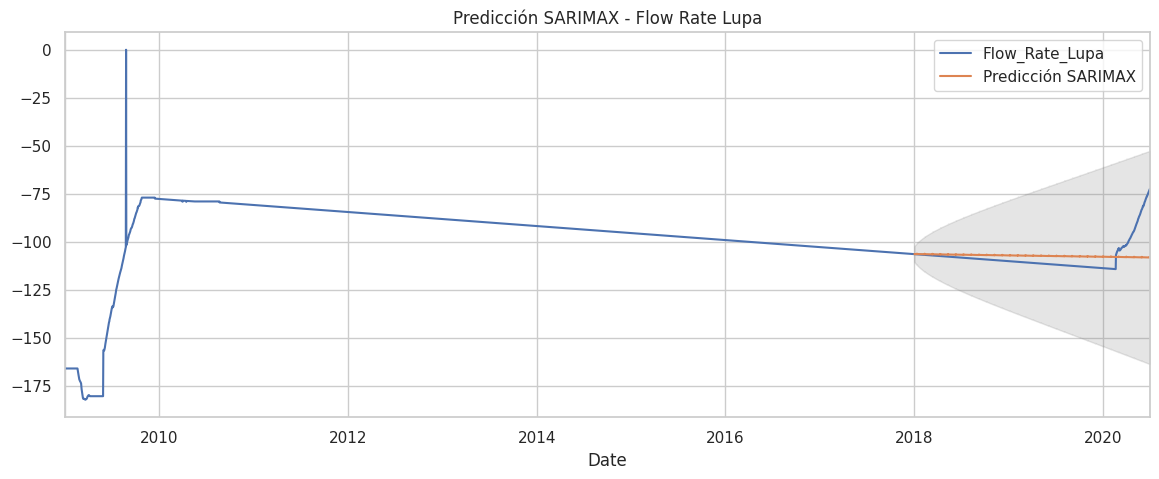

MAE (SARIMAX): 4.934 m³/s
RMSE (SARIMAX): 7.801 m³/s


In [23]:
# Predicción
pred = results.get_forecast(steps=len(test))
pred_ci = pred.conf_int()

# Visualización
ax = ts.plot(label='Real', figsize=(14, 5))
pred.predicted_mean.plot(ax=ax, label='Predicción SARIMAX')
ax.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color='gray', alpha=0.2)
plt.legend()
plt.title("Predicción SARIMAX - Flow Rate Lupa")
plt.show()

# Métricas
mae_sarimax = mean_absolute_error(test, pred.predicted_mean)
rmse_sarimax = np.sqrt(mean_squared_error(test, pred.predicted_mean))

print(f"MAE (SARIMAX): {mae_sarimax:.3f} m³/s")
print(f"RMSE (SARIMAX): {rmse_sarimax:.3f} m³/s")


In [24]:
from sklearn.preprocessing import MinMaxScaler

# Escalado
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(ts)

# Crear secuencias
def create_sequences(data, lookback=30):
    X, y = [], []
    for i in range(lookback, len(data)):
        X.append(data[i-lookback:i])
        y.append(data[i])
    return np.array(X), np.array(y)

lookback = 30
X, y = create_sequences(scaled_data, lookback)

# División 80/20 temporal
split = int(len(X)*0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]


In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model_lstm = Sequential()
model_lstm.add(LSTM(50, activation='tanh', input_shape=(lookback, 1)))
model_lstm.add(Dense(1))
model_lstm.compile(optimizer='adam', loss='mse')
model_lstm.summary()

# Entrenamiento
model_lstm.fit(X_train, y_train, epochs=20, batch_size=16, validation_split=0.1, verbose=1)


/home/beacastro/anaconda3/envs/datascience/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 50)             │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,451 (40.82 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0345 - val_loss: 2.4597e-05
Epoch 2/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.9847e-04 - val_loss: 1.1985e-05
Epoch 3/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.8331e-04 - val_loss: 1.6451e-08
Epoch 4/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 2.1108e-04 - val_loss: 1.4532e-06
Epoch 5/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.3200e-04 - val_loss: 7.8252e-07
Epoch 6/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 9.0450e-05 - val_loss: 2.4064e-06
Epoch 7/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.2665e-04 - val_loss: 1.1780e-07
Epoch 8/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 2.7699e-04 - val_loss: 3.8014e-06
Epoch 9/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2.1274e-04 - val_loss: 6.4401e-07
Epoch 10/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.9316e-04 - val_loss: 6.0358e-07
Epoch 11/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 7.

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


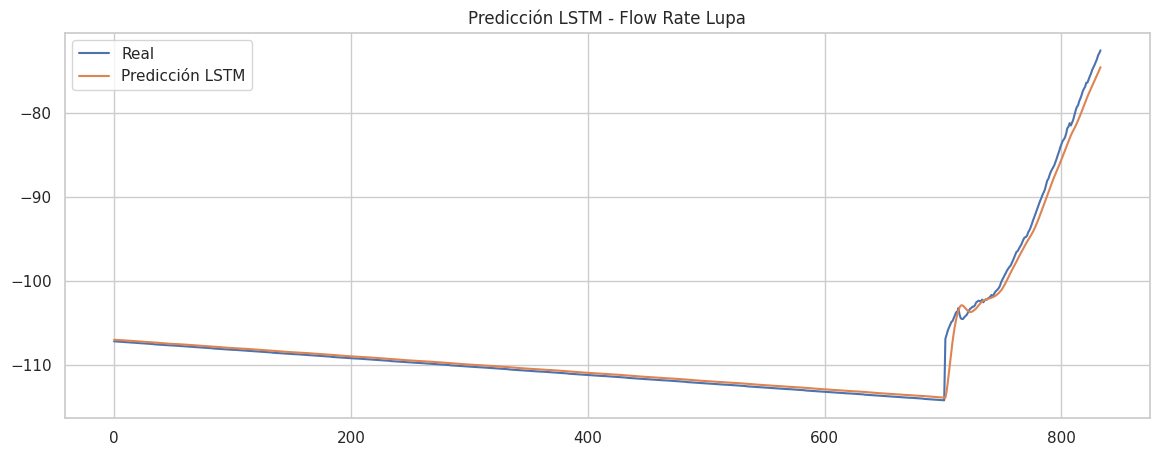

MAE (LSTM): 0.436 m³/s
RMSE (LSTM): 0.749 m³/s


In [26]:
# Predicción
y_pred_scaled = model_lstm.predict(X_test)

# Inversión del escalado
y_test_inv = scaler.inverse_transform(y_test)
y_pred_inv = scaler.inverse_transform(y_pred_scaled)

# Visualización
plt.figure(figsize=(14, 5))
plt.plot(y_test_inv, label='Real')
plt.plot(y_pred_inv, label='Predicción LSTM')
plt.title('Predicción LSTM - Flow Rate Lupa')
plt.legend()
plt.show()

# Métricas
mae_lstm = mean_absolute_error(y_test_inv, y_pred_inv)
rmse_lstm = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))

print(f"MAE (LSTM): {mae_lstm:.3f} m³/s")
print(f"RMSE (LSTM): {rmse_lstm:.3f} m³/s")


Resultados de Modelado – Water Spring Lupa

SARIMAX
    MAE (Error Absoluto Medio): 4.934 m³/s
    RMSE (Raíz del Error Cuadrático Medio): 7.801 m³/s

Gráfica:
    La predicción de SARIMAX (línea naranja) se mantiene bastante estable, pero no logra adaptarse a las variaciones reales de la serie temporal (línea azul).
    El intervalo de confianza es muy amplio en el futuro, lo que sugiere incertidumbre alta en la predicción.
    El modelo parece subestimar sistemáticamente los valores reales.

LSTM
    MAE: 0.436 m³/s
    RMSE: 0.749 m³/s

Gráfica:
    La predicción LSTM se ajusta mucho mejor a la forma de la curva real, especialmente en la zona de tendencia creciente hacia el final del periodo.
    Se observa una mayor capacidad del modelo para capturar patrones no lineales y transiciones abruptas.
    El error es significativamente menor en comparación con SARIMAX, lo que refuerza la superioridad del LSTM en este caso.

Conclusión
El modelo LSTM supera claramente al SARIMAX en la predicción del caudal de la fuente Lupa, tanto en las métricas de error (MAE y RMSE) como en la fidelidad visual a la serie real.

Modelo	        MAE (m³/s)	        RMSE (m³/s)
SARIMAX	          4.934	                7.801
LSTM	          0.436	                0.749

WATER-SPRING_MADONNA_di_CANNETO

In [ ]:
# Carga de datos
df_madonna = pd.read_csv("/workspaces/series_temporales/data/raw/acea-water-prediction/Water_Spring_Madonna_di_Canneto.csv")

# Vista rápida
df_madonna.head()

,Date,Rainfall_Settefrati,Temperature_Settefrati,Flow_Rate_Madonna_di_Canneto
0,01/01/2012,0.0,5.25,NaN
1,02/01/2012,5.6,6.65,NaN
2,03/01/2012,10.0,8.85,NaN
3,04/01/2012,0.0,6.75,NaN
4,05/01/2012,1.0,5.55,NaN


In [28]:
import matplotlib.pyplot as plt

# Convertir la columna Date a tipo datetime e indexar
df_madonna['Date'] = pd.to_datetime(df_madonna['Date'], format='%d/%m/%Y')
df_madonna.set_index('Date', inplace=True)

# Visualización de nulos
df_madonna.isnull().sum()


Rainfall_Settefrati              556
Temperature_Settefrati           556
Flow_Rate_Madonna_di_Canneto    1726
dtype: int64

In [29]:
# Selección de variable objetivo
ts = df_madonna[['Flow_Rate_Madonna_di_Canneto']].copy()

# Relleno de valores nulos
ts.fillna(method='ffill', inplace=True)
ts.fillna(method='bfill', inplace=True)

# Verificar que no hay NaNs
ts.isnull().sum()


/tmp/ipykernel_72040/2452023457.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ts.fillna(method='ffill', inplace=True)
/tmp/ipykernel_72040/2452023457.py:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ts.fillna(method='bfill', inplace=True)


Flow_Rate_Madonna_di_Canneto    0
dtype: int64

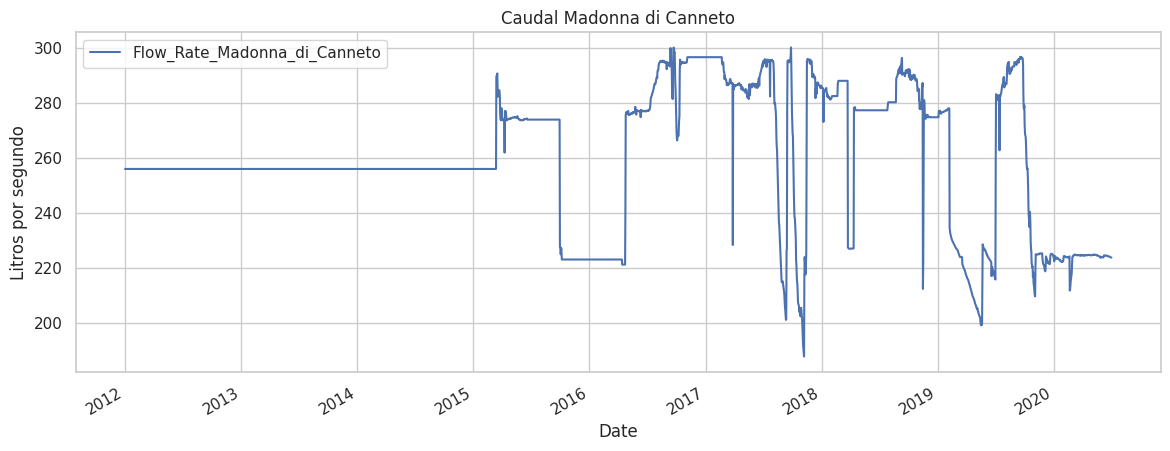

In [30]:
# Visualización de la serie temporal
ts.plot(figsize=(14, 5), title='Caudal Madonna di Canneto')
plt.ylabel("Litros por segundo")
plt.grid(True)
plt.show()


In [ ]:
# Eliminar filas con índice nulo 
ts = ts[ts.index.notnull()]

# Reordenar por si acaso
ts = ts.sort_index()

# División en train y test con fechas exactas
train = ts[:'2018-12-31']
test = ts['2019-01-01':]

# Verificación
print("Train:", train.shape)
print("Test:", test.shape)


Train: (2557, 1)
Test: (547, 1)


In [36]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Definir modelo
model = SARIMAX(train, order=(2, 1, 2), seasonal_order=(1, 1, 1, 30),
                enforce_stationarity=False, enforce_invertibility=False)

# Entrenamiento
results = model.fit(disp=True, method='powell')


/home/beacastro/anaconda3/envs/datascience/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/beacastro/anaconda3/envs/datascience/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Optimization terminated successfully.
         Current function value: 2.698224
         Iterations: 4
         Function evaluations: 284


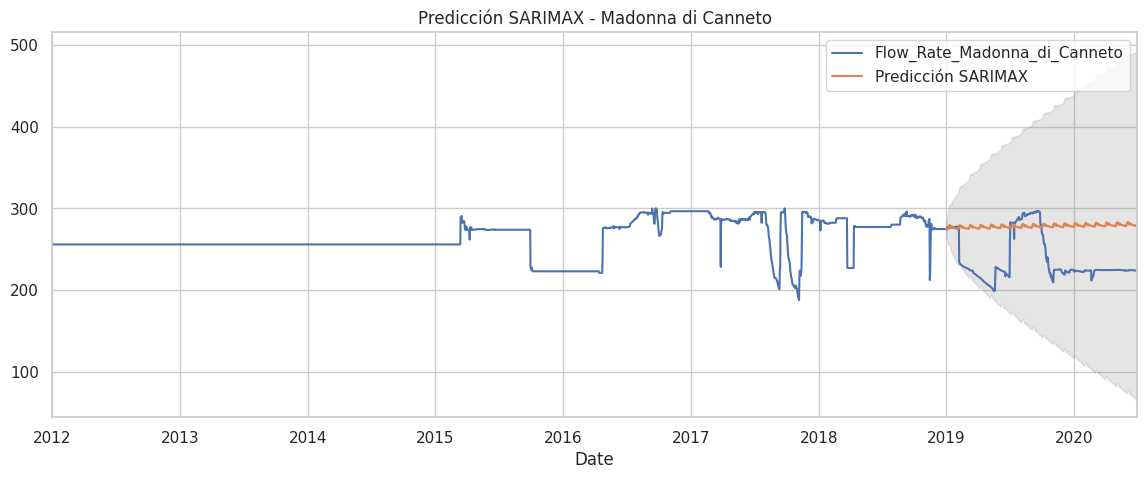

MAE (SARIMAX): 44.673 litros/segundo
RMSE (SARIMAX): 49.580 litros/segundo


In [37]:
# Predicción
pred = results.get_forecast(steps=len(test))
pred_ci = pred.conf_int()

# Gráfico
ax = ts.plot(label='Real', figsize=(14, 5))
pred.predicted_mean.plot(ax=ax, label='Predicción SARIMAX')
ax.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color='gray', alpha=0.2)
plt.legend()
plt.title("Predicción SARIMAX - Madonna di Canneto")
plt.show()

# Métricas
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae = mean_absolute_error(test, pred.predicted_mean)
rmse = np.sqrt(mean_squared_error(test, pred.predicted_mean))
print(f"MAE (SARIMAX): {mae:.3f} litros/segundo")
print(f"RMSE (SARIMAX): {rmse:.3f} litros/segundo")


In [38]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Escalado
scaler = MinMaxScaler()
ts_scaled = scaler.fit_transform(ts)

# Función para crear ventanas de lookback
def create_dataset(data, look_back=30):
    X, y = [], []
    for i in range(look_back, len(data)):
        X.append(data[i - look_back:i])
        y.append(data[i])
    return np.array(X), np.array(y)

look_back = 30
X, y = create_dataset(ts_scaled, look_back)

# División en train y test
X_train, X_test = X[:int(len(X)*0.8)], X[int(len(X)*0.8):]
y_train, y_test = y[:int(len(X)*0.8)], y[int(len(X)*0.8):]


In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Definición del modelo
model_lstm = Sequential()
model_lstm.add(LSTM(50, activation='relu', input_shape=(look_back, 1)))
model_lstm.add(Dense(1))
model_lstm.compile(optimizer='adam', loss='mse')

# Entrenamiento
model_lstm.fit(X_train, y_train, epochs=30, batch_size=32, verbose=1)


Epoch 1/30


/home/beacastro/anaconda3/envs/datascience/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
I0000 00:00:1744218821.987683   72713 service.cc:146] XLA service 0x723f14754e60 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1744218821.987708   72713 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce RTX 4060 Laptop GPU, Compute Capability 8.9
2025-04-09 19:13:42.012926: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.


34/77 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3132  

I0000 00:00:1744218822.381088   72713 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.2049
Epoch 2/30
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0046
Epoch 3/30
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0041
Epoch 4/30
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0028
Epoch 5/30
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0028
Epoch 6/30
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0024
Epoch 7/30
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0017
Epoch 8/30
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0020
Epoch 9/30
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0019
Epoch 10/30
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0019
Epoch 11/30
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0015
Epoch 12/30
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0012 
Epoch 13/30
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0013
Epoch 14/30
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0012
Epoch 15/30
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0015
Epoch 16/30
77/77 ━━━━━━━━━━

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


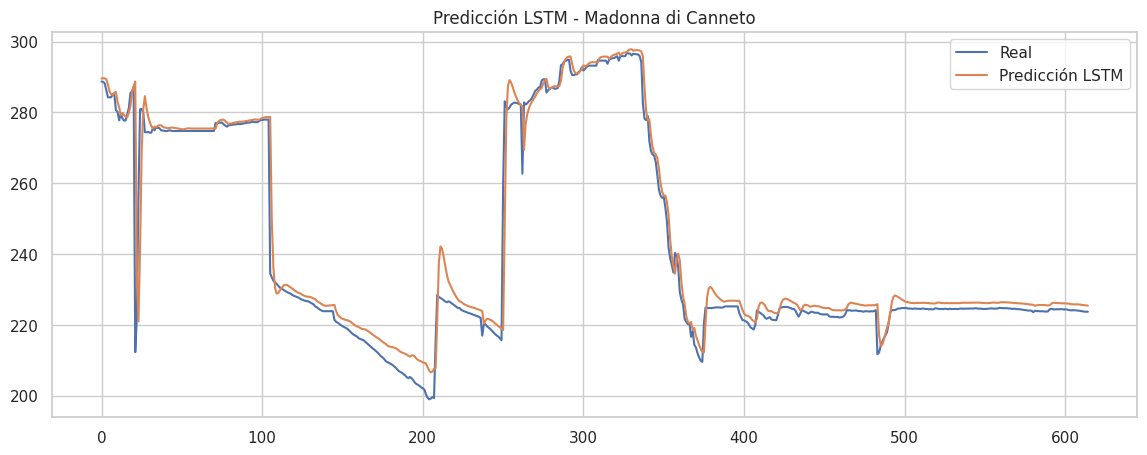

MAE (LSTM): 2.828 litros/segundo
RMSE (LSTM): 5.753 litros/segundo


In [40]:
# Predicción
y_pred = model_lstm.predict(X_test)

# Inversión del escalado
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_inv = scaler.inverse_transform(y_pred)

# Métricas
mae_lstm = mean_absolute_error(y_test_inv, y_pred_inv)
rmse_lstm = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))

# Gráfico
plt.figure(figsize=(14, 5))
plt.plot(y_test_inv, label='Real')
plt.plot(y_pred_inv, label='Predicción LSTM')
plt.legend()
plt.title("Predicción LSTM - Madonna di Canneto")
plt.show()

print(f"MAE (LSTM): {mae_lstm:.3f} litros/segundo")
print(f"RMSE (LSTM): {rmse_lstm:.3f} litros/segundo")


Interpretación de Resultados - Water Spring Madonna di Canneto

Modelo SARIMAX - Resultados
Gráfica:
    La serie real muestra valores muy variables y discontinuidades, con algunos bloques constantes de caudal seguidos de caídas abruptas.
    La predicción de SARIMAX (línea naranja) se mantiene bastante plana tras el corte de entrenamiento, sin capturar del todo los descensos y picos posteriores.

Métricas de error:
    MAE (SARIMAX): 44.673 litros/segundo
    RMSE (SARIMAX): 49.580 litros/segundo

Interpretación:
    Aunque el modelo capta la tendencia general de estabilidad a lo largo del tiempo, no logra adaptarse bien a las oscilaciones abruptas ni a los cambios de régimen que se observan en la serie real.
    Esto es típico en modelos lineales como SARIMAX cuando se enfrentan a comportamientos no lineales, cambios de nivel abruptos o datos con características estacionales complejas.

Modelo LSTM - Resultados
Gráfica:
    El modelo LSTM (línea naranja) sigue mucho mejor la forma de la curva real, incluyendo las subidas rápidas, caídas abruptas y tramos planos.
    Existe un desfase mínimo en algunas partes, pero la forma general está bien capturada.

Métricas de error:
    MAE (LSTM): 2.828 litros/segundo
    RMSE (LSTM): 5.753 litros/segundo

Interpretación:
    El LSTM se ajusta considerablemente mejor al comportamiento real, lo que se refleja en métricas de error mucho más bajas que las de SARIMAX.
    Esto se debe a que el modelo LSTM es capaz de capturar relaciones no lineales y temporales más complejas, especialmente útil en series con dinámicas abruptas o no estacionarias.

Conclusión general
Modelo	        MAE(litros/seg)	        RMSE(litros/seg)	        Comentario
SARIMAX	            44.673	                49.580	                Predicción plana, poco sensible a variaciones
LSTM	            2.828	                5.753	                Mucho más preciso, capta los cambios de nivel
